# Google Data Studio: https://datastudio.google.com/reporting/0bc3f7dc-674b-4d0e-8053-356e8b876a30

# **WORLD CUP PROJECT** 
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams qualify for the tournament phase. In the tournament phase, 32 teams, including the automatically qualifying host nation(s), compete for the title at venues within the host nation(s) over about a month.

Link: https://en.wikipedia.org/wiki/FIFA_World_Cup
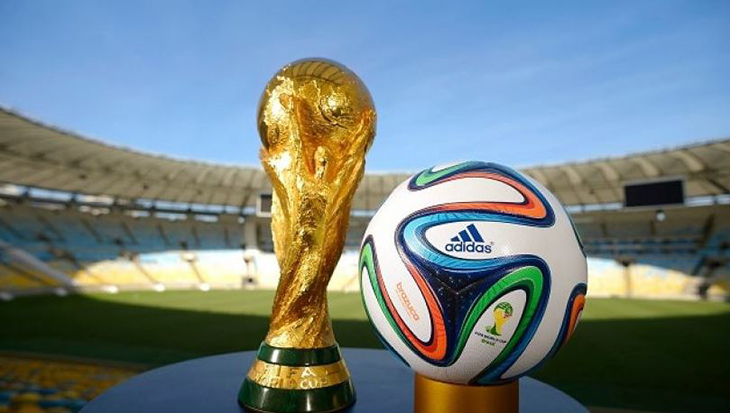

# HOW FAR A HOME TEAM CAN MAKE IT THROUGH?

##Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
wc = pd.read_csv('/content/gdrive/MyDrive/WorldCupData/WorldCups.csv')
match = pd.read_csv('/content/gdrive/MyDrive/WorldCupData/WorldCupMatches.csv')
player = pd.read_csv('/content/gdrive/MyDrive/WorldCupData/WorldCupPlayers.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. World Cup Data Table - Cleaning








In [ ]:
wc

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [ ]:
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


## Overview World Cup table
- Year: Year of the WC
- Country: Host country of the WC
- Winner: WC champions team
- Runners-Up: the second place team
- Third: The third place team
- Fourth: The fourth place team
- Goals: Total goals scored in the WC
- Teams: Total qualified teams
- Matches: Total matches played in the WC
- Attendance: Total attendances of the WC

In [ ]:
#overview 
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
wc.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


## Cleaning



### Rename GoalScored, QualifiedTeams, MatchesPlayed columns

In [ ]:
#rename GoalsScored, QualifiedTeams, MatchesPlayed to Goals, Teams, Matches
wc.rename(columns={'GoalsScored': 'Goals', 'QualifiedTeams':'Teams', 'MatchesPlayed': 'Matches'}, inplace=True)

In [ ]:
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


### Change 'Attendance' to integer type




In [ ]:
#change column 'Attendance' to int64 type
#remove '.'
wc['Attendance'] = wc['Attendance'].str.replace('.','')
#change to string type
wc['Attendance'] = wc['Attendance'].astype('int64')

In [ ]:
#check it again
type(wc['Attendance'][0])

numpy.int64

In [ ]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        20 non-null     int64 
 1   Country     20 non-null     object
 2   Winner      20 non-null     object
 3   Runners-Up  20 non-null     object
 4   Third       20 non-null     object
 5   Fourth      20 non-null     object
 6   Goals       20 non-null     int64 
 7   Teams       20 non-null     int64 
 8   Matches     20 non-null     int64 
 9   Attendance  20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [ ]:
wc['Year'] = pd.to_datetime(wc['Year'], format='%Y').dt.year

In [ ]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        20 non-null     int64 
 1   Country     20 non-null     object
 2   Winner      20 non-null     object
 3   Runners-Up  20 non-null     object
 4   Third       20 non-null     object
 5   Fourth      20 non-null     object
 6   Goals       20 non-null     int64 
 7   Teams       20 non-null     int64 
 8   Matches     20 non-null     int64 
 9   Attendance  20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


### Check duplicated rows

In [ ]:
#check for duplicated rows
wc.duplicated().sum()

0

In [ ]:
#check for duplicated year
wc['Year'].duplicated().sum()

0

In [ ]:
wc

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
#number of time that a country host a world cup
wc['Country'].value_counts()

France          2
Italy           2
Germany         2
Mexico          2
Brazil          2
Chile           1
Switzerland     1
Uruguay         1
South Africa    1
Korea/Japan     1
Spain           1
USA             1
England         1
Argentina       1
Sweden          1
Name: Country, dtype: int64

In [ ]:
#check for duplicated in 'Country' column
wc[wc['Country'].duplicated()]['Country']

12     Mexico
13      Italy
15     France
17    Germany
19     Brazil
Name: Country, dtype: object

In [ ]:
#check it again and see that is ok to have duplicated value in 'Country'
#and the same thing as Winner, Runners-up, Third, Fourth columns
wc[wc['Country'].str.contains('Brazil')]

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810


In [ ]:
#Winner column
wc['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
Spain         1
France        1
Germany       1
England       1
Name: Winner, dtype: int64

In [ ]:
#check runner up column
wc['Runners-Up'].value_counts()

Germany FR        3
Netherlands       3
Argentina         3
Brazil            2
Hungary           2
Czechoslovakia    2
Italy             2
France            1
Germany           1
Sweden            1
Name: Runners-Up, dtype: int64

In [ ]:
#check third-place
wc['Third'].value_counts()

Germany        3
France         2
Poland         2
Brazil         2
Sweden         2
USA            1
Portugal       1
Chile          1
Croatia        1
Italy          1
Germany FR     1
Netherlands    1
Turkey         1
Austria        1
Name: Third, dtype: int64

In [ ]:
#check fourth-place
wc['Fourth'].value_counts()

Uruguay           3
Yugoslavia        2
Brazil            2
Belgium           1
Korea Republic    1
Soviet Union      1
France            1
Bulgaria          1
Italy             1
Spain             1
Portugal          1
Germany FR        1
Netherlands       1
England           1
Sweden            1
Austria           1
Name: Fourth, dtype: int64

In [ ]:
#there are 'Germany FR' and 'Germany' in Winner	Runners-Up, Third	and Fourth, we'll count it as one
wc.replace('Germany FR', 'Germany', inplace=True)

In [ ]:
#check winner column and see that Germay is 4-times winner
wc['Winner'].value_counts()

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

In [ ]:
wc['Runners-Up'].value_counts()

Germany           4
Netherlands       3
Argentina         3
Brazil            2
Hungary           2
Czechoslovakia    2
Italy             2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [ ]:
wc['Third'].value_counts()

Germany        4
France         2
Poland         2
Brazil         2
Sweden         2
USA            1
Portugal       1
Chile          1
Croatia        1
Italy          1
Netherlands    1
Turkey         1
Austria        1
Name: Third, dtype: int64

In [ ]:
wc['Fourth'].value_counts()

Uruguay           3
Yugoslavia        2
Brazil            2
Belgium           1
Korea Republic    1
Soviet Union      1
France            1
Bulgaria          1
Germany           1
Italy             1
Spain             1
Portugal          1
Netherlands       1
England           1
Sweden            1
Austria           1
Name: Fourth, dtype: int64

### Check numerical columns: Goals, Teams, Matches, Attendance

In [ ]:
wc

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
pd.options.display.float_format = "{:.2f}".format

### Korea and Japan host WC 2002 together (seperate Korea and Japan into 2 rows)


In [ ]:
new_country = wc['Country'].str.split('/').explode('Country')
new_country

0          Uruguay
1            Italy
2           France
3           Brazil
4      Switzerland
5           Sweden
6            Chile
7          England
8           Mexico
9          Germany
10       Argentina
11           Spain
12          Mexico
13           Italy
14             USA
15          France
16           Korea
17           Japan
18         Germany
19    South Africa
20          Brazil
Name: Country, dtype: object

In [ ]:
wc = wc.append(wc[wc['Country'] == 'Korea/Japan']).sort_values('Year').reset_index()
wc.drop(columns='index',inplace=True)
wc

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
wc['Country']

0          Uruguay
1            Italy
2           France
3           Brazil
4      Switzerland
5           Sweden
6            Chile
7          England
8           Mexico
9          Germany
10       Argentina
11           Spain
12          Mexico
13           Italy
14             USA
15          France
16     Korea/Japan
17     Korea/Japan
18         Germany
19    South Africa
20          Brazil
Name: Country, dtype: object

In [ ]:
wc['Country'] = new_country
wc

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
wc.replace('Korea', 'Korea Republic', inplace= True)

## Final result

In [ ]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        21 non-null     int64 
 1   Country     21 non-null     object
 2   Winner      21 non-null     object
 3   Runners-Up  21 non-null     object
 4   Third       21 non-null     object
 5   Fourth      21 non-null     object
 6   Goals       21 non-null     int64 
 7   Teams       21 non-null     int64 
 8   Matches     21 non-null     int64 
 9   Attendance  21 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.8+ KB


#2. Matches Data Table - Cleaning


## Overview Matches table
- Year: year of the world cup
- Datetime: kick-off time of a WC match
- Stage: group stage, round of 16 stage, quarter-finals, semi-finals, third-place, finals,...
- Stadium, City: location of the match
- Home Team Name, Away Team Name: name of a country play as a home team or away team
- Home Team Goals, Away Team Goals: goals scored by the home team and away team
- Win conditions: a match result was decided after full-time match (a team win in extra-time or penalties shoot-out)
- Half-time Home Goals, Half-time Away Goals: goals scored by the home team and away team in the first half
- Referee, Asisstant 1, Asisstant 2: information about referee team
- Attendance: number of people attended to the match
- Home Team Initials, Away Team Initials: short name of a country

## Remove unwanted data (Referee and assistant, home team and away team initials, stadium, city)

In [ ]:
match.drop(columns=['Referee', 'Assistant 1', 'Assistant 2','Home Team Initials', 'Away Team Initials'], inplace=True)

In [ ]:
match.drop(columns=['Stadium','City'],inplace=True)

In [ ]:
match.rename(columns={'Home Team Name': 'HomeName',
                      'Home Team Goals': 'HomeGoals',
                      'Away Team Goals': 'AwayGoals',
                      'Away Team Name': 'AwayName',
                      'Half-time Home Goals': 'HT_HomeGoals',
                      'Half-time Away Goals': 'HT_AwayGoals'}, inplace=True)

### Check for null rows


In [ ]:
match.isnull().sum()

Year              3720
Datetime          3720
Stage             3720
HomeName          3720
HomeGoals         3720
AwayGoals         3720
AwayName          3720
Win conditions    3720
Attendance        3722
HT_HomeGoals      3720
HT_AwayGoals      3720
RoundID           3720
MatchID           3720
dtype: int64

In [ ]:
#remove null value
match.dropna(inplace=True)
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            850 non-null    float64
 1   Datetime        850 non-null    object 
 2   Stage           850 non-null    object 
 3   HomeName        850 non-null    object 
 4   HomeGoals       850 non-null    float64
 5   AwayGoals       850 non-null    float64
 6   AwayName        850 non-null    object 
 7   Win conditions  850 non-null    object 
 8   Attendance      850 non-null    float64
 9   HT_HomeGoals    850 non-null    float64
 10  HT_AwayGoals    850 non-null    float64
 11  RoundID         850 non-null    float64
 12  MatchID         850 non-null    float64
dtypes: float64(8), object(5)
memory usage: 93.0+ KB


### Change datatype: Year, Hometeam and away goals, Half-time home and away goals, attendance to integer

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            850 non-null    float64
 1   Datetime        850 non-null    object 
 2   Stage           850 non-null    object 
 3   HomeName        850 non-null    object 
 4   HomeGoals       850 non-null    float64
 5   AwayGoals       850 non-null    float64
 6   AwayName        850 non-null    object 
 7   Win conditions  850 non-null    object 
 8   Attendance      850 non-null    float64
 9   HT_HomeGoals    850 non-null    float64
 10  HT_AwayGoals    850 non-null    float64
 11  RoundID         850 non-null    float64
 12  MatchID         850 non-null    float64
dtypes: float64(8), object(5)
memory usage: 93.0+ KB


In [ ]:
#change year type
match['Year'] = pd.to_datetime(match['Year'], format='%Y').dt.year

In [ ]:
#change Hometeam and away goals, Half-time home and away goals, attendance to integer
match[['Year', 'HomeGoals', 'AwayGoals', 'Attendance', 'HT_HomeGoals', 'HT_AwayGoals']] = match[['Year', 'HomeGoals', 'AwayGoals', 'Attendance', 'HT_HomeGoals', 'HT_AwayGoals']].astype('int64')

In [ ]:
match[['RoundID','MatchID']] = match[['RoundID','MatchID']].astype('int64')

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            850 non-null    int64 
 1   Datetime        850 non-null    object
 2   Stage           850 non-null    object
 3   HomeName        850 non-null    object
 4   HomeGoals       850 non-null    int64 
 5   AwayGoals       850 non-null    int64 
 6   AwayName        850 non-null    object
 7   Win conditions  850 non-null    object
 8   Attendance      850 non-null    int64 
 9   HT_HomeGoals    850 non-null    int64 
 10  HT_AwayGoals    850 non-null    int64 
 11  RoundID         850 non-null    int64 
 12  MatchID         850 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 93.0+ KB


In [ ]:
match.isna().sum()

Year              0
Datetime          0
Stage             0
HomeName          0
HomeGoals         0
AwayGoals         0
AwayName          0
Win conditions    0
Attendance        0
HT_HomeGoals      0
HT_AwayGoals      0
RoundID           0
MatchID           0
dtype: int64

### Change Datetime to datetime type


In [ ]:
match['Datetime'] = pd.to_datetime(match['Datetime'])

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            850 non-null    int64         
 1   Datetime        850 non-null    datetime64[ns]
 2   Stage           850 non-null    object        
 3   HomeName        850 non-null    object        
 4   HomeGoals       850 non-null    int64         
 5   AwayGoals       850 non-null    int64         
 6   AwayName        850 non-null    object        
 7   Win conditions  850 non-null    object        
 8   Attendance      850 non-null    int64         
 9   HT_HomeGoals    850 non-null    int64         
 10  HT_AwayGoals    850 non-null    int64         
 11  RoundID         850 non-null    int64         
 12  MatchID         850 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 93.0+ KB


## Clean text columns: Stage, HomeName, AwayName

### Check Stage column: 
- Preliminary round -> Round of 16
- First round -> Round of 16
- 'Match for third place', 'Play-off for third place' -> Third place
- Group 1-6, Group A-H -> group

In [ ]:
sorted(list(match['Stage'].unique()))

['Final',
 'First round',
 'Group 1',
 'Group 2',
 'Group 3',
 'Group 4',
 'Group 5',
 'Group 6',
 'Group A',
 'Group B',
 'Group C',
 'Group D',
 'Group E',
 'Group F',
 'Group G',
 'Group H',
 'Match for third place',
 'Play-off for third place',
 'Preliminary round',
 'Quarter-finals',
 'Round of 16',
 'Semi-finals',
 'Third place']

In [ ]:
match['Stage'].value_counts()

Round of 16                 70
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group F                     48
Group E                     48
Group C                     48
Group D                     48
Semi-finals                 36
Group H                     30
Group G                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Stage, dtype: int64

In [ ]:
#preliminary round is round of 16 in 1934
match['Stage'].replace('Preliminary round', 'Round of 16', inplace=True)
match['Stage'].value_counts()

Round of 16                 78
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group E                     48
Group C                     48
Group F                     48
Group D                     48
Semi-finals                 36
Group H                     30
Group G                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Stage, dtype: int64

In [ ]:
#first round is round of 16 in 1938
match['Stage'].replace('First round', 'Round of 16', inplace=True)
match['Stage'].value_counts()

Round of 16                 87
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group E                     48
Group F                     48
Group D                     48
Group C                     48
Semi-finals                 36
Group H                     30
Group G                     30
Final                       20
Match for third place       15
Group 6                     12
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Stage, dtype: int64

In [ ]:
# 'Match for third place', 'Play-off for third place' and 'Third place' count as 1
match['Stage'].replace('Match for third place', 'Third place', inplace=True)
match['Stage'].replace('Play-off for third place', 'Third place', inplace=True)
match['Stage'].value_counts()

Round of 16       87
Quarter-finals    66
Group 1           62
Group A           60
Group B           60
Group 2           59
Group 3           56
Group 4           55
Group E           48
Group F           48
Group D           48
Group C           48
Semi-finals       36
Group H           30
Group G           30
Final             20
Third place       19
Group 6           12
Group 5            6
Name: Stage, dtype: int64

In [ ]:
import re
def clean_group_stage(row):
  text = re.sub('Group\s[A-Za-z0-9]', 'Group', row)
  return text

In [ ]:
match['Stage'] = match['Stage'].apply(clean_group_stage)
match['Stage'].value_counts()

Group             622
Round of 16        87
Quarter-finals     66
Semi-finals        36
Final              20
Third place        19
Name: Stage, dtype: int64

In [ ]:
match[match.duplicated()]

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Win conditions,Attendance,HT_HomeGoals,HT_AwayGoals,RoundID,MatchID
836,2014,2014-06-28 13:00:00,Round of 16,Brazil,1,1,Chile,Brazil win on penalties (3 - 2),57714,0,0,255951,300186487
837,2014,2014-06-28 17:00:00,Round of 16,Colombia,2,0,Uruguay,,73804,1,0,255951,300186491
838,2014,2014-06-29 13:00:00,Round of 16,Netherlands,2,1,Mexico,,58817,0,0,255951,300186508
839,2014,2014-06-29 17:00:00,Round of 16,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,255951,300186459
840,2014,2014-06-30 13:00:00,Round of 16,France,2,0,Nigeria,,67882,0,0,255951,300186462
842,2014,2014-07-01 13:00:00,Round of 16,Argentina,1,0,Switzerland,Argentina win after extra time,63255,0,0,255951,300186503
843,2014,2014-07-01 17:00:00,Round of 16,Belgium,2,1,USA,Belgium win after extra time,51227,0,0,255951,300186497
844,2014,2014-07-04 13:00:00,Quarter-finals,France,0,1,Germany,,74240,0,1,255953,300186485
845,2014,2014-07-04 17:00:00,Quarter-finals,Brazil,2,1,Colombia,,60342,1,0,255953,300186461
846,2014,2014-07-05 13:00:00,Quarter-finals,Argentina,1,0,Belgium,,68551,1,0,255953,300186504


In [ ]:
match[(match['HomeName'] == 'Brazil') & (match['AwayName'] == 'Chile')] 

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Win conditions,Attendance,HT_HomeGoals,HT_AwayGoals,RoundID,MatchID
165,1962,1962-06-13 14:30:00,Semi-finals,Brazil,4,2,Chile,,76594,2,1,514,1458
565,1998,1998-06-27 21:00:00,Round of 16,Brazil,4,1,Chile,,45500,3,0,1024,8773
761,2010,2010-06-28 20:30:00,Round of 16,Brazil,3,0,Chile,,54096,2,0,249717,300061500
820,2014,2014-06-28 13:00:00,Round of 16,Brazil,1,1,Chile,Brazil win on penalties (3 - 2),57714,0,0,255951,300186487
836,2014,2014-06-28 13:00:00,Round of 16,Brazil,1,1,Chile,Brazil win on penalties (3 - 2),57714,0,0,255951,300186487


In [ ]:
match.duplicated().sum()

15

In [ ]:
match.shape

(850, 13)

In [ ]:
match.drop_duplicates(inplace=True)
match.shape

(835, 13)

### Check HomeName, AwayName

In [ ]:
sorted(list(match['AwayName'].unique()))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosni

In [ ]:
sorted(list(match['HomeName'].unique()))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosnia and Herzegovina',
 'rn">Republic of Ireland',
 'rn">Serbia and Monte

### Replace and clean text: 
- Germany FR -> Germany
- C�te d'Ivoire -> Côte d'Ivoire
- IR Iran -> Iran

In [ ]:
match.replace('Germany FR', 'Germany',inplace=True)

In [ ]:
match.replace('C�te d\'Ivoire', 'Côte d\'Ivoire',inplace=True)

In [ ]:
match.replace('IR Iran', 'Iran',inplace=True)

In [ ]:
match['HomeName'] = match['HomeName'].str.replace('rn\">', '')

In [ ]:
match['AwayName'] = match['AwayName'].str.replace('rn\">', '')

In [ ]:
match.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Win conditions,Attendance,HT_HomeGoals,HT_AwayGoals,RoundID,MatchID
0,1930,1930-07-13 15:00:00,Group,France,4,1,Mexico,,4444,3,0,201,1096
1,1930,1930-07-13 15:00:00,Group,USA,3,0,Belgium,,18346,2,0,201,1090
2,1930,1930-07-14 12:45:00,Group,Yugoslavia,2,1,Brazil,,24059,2,0,201,1093
3,1930,1930-07-14 14:50:00,Group,Romania,3,1,Peru,,2549,1,0,201,1098
4,1930,1930-07-15 16:00:00,Group,Argentina,1,0,France,,23409,0,0,201,1085


### Clean string columns

In [ ]:
def clean_text(text):
  text = text.replace('-', ' ')
  return text

In [ ]:
match['Stage'] = match['Stage'].apply(clean_text)

In [ ]:
match['HomeName'] = match['HomeName'].apply(clean_text)

In [ ]:
match['AwayName'] = match['AwayName'].apply(clean_text)

In [ ]:
match['Stage'].value_counts()

Group             622
Round of 16        80
Quarter finals     62
Semi finals        34
Final              19
Third place        18
Name: Stage, dtype: int64

## Final Result

In [ ]:
match

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Win conditions,Attendance,HT_HomeGoals,HT_AwayGoals,RoundID,MatchID
0,1930,1930-07-13 15:00:00,Group,France,4,1,Mexico,,4444,3,0,201,1096
1,1930,1930-07-13 15:00:00,Group,USA,3,0,Belgium,,18346,2,0,201,1090
2,1930,1930-07-14 12:45:00,Group,Yugoslavia,2,1,Brazil,,24059,2,0,201,1093
3,1930,1930-07-14 14:50:00,Group,Romania,3,1,Peru,,2549,1,0,201,1098
4,1930,1930-07-15 16:00:00,Group,Argentina,1,0,France,,23409,0,0,201,1085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014,2014-07-05 13:00:00,Quarter finals,Argentina,1,0,Belgium,,68551,1,0,255953,300186504
832,2014,2014-06-29 13:00:00,Round of 16,Netherlands,2,1,Mexico,,58817,0,0,255951,300186508
833,2014,2014-06-29 17:00:00,Round of 16,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,255951,300186459
834,2014,2014-07-01 13:00:00,Round of 16,Argentina,1,0,Switzerland,Argentina win after extra time,63255,0,0,255951,300186503


# Overview about the WC

In [ ]:
wc['Country'].value_counts()

France            2
Italy             2
Germany           2
Mexico            2
Brazil            2
Chile             1
Korea Republic    1
Switzerland       1
Uruguay           1
South Africa      1
Spain             1
USA               1
England           1
Argentina         1
Japan             1
Sweden            1
Name: Country, dtype: int64

# BIG QUESTION: The success of World Cup (WC) home teams?

In [ ]:
#write a function to create Host Country Achievement columns
def home_team_top4(rows):
    if rows['Country'] == rows['Winner']:
      return 'Winner'
    elif rows['Country'] == rows['Runners-Up']:
      return 'Second'
    elif rows['Country'] == rows['Third']:
      return 'Third'
    elif rows['Country'] == rows['Fourth']:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
#create HomeTeamAchievement column
wc['HostCountryAchievement'] = wc.apply(home_team_top4, axis=1)

In [ ]:
wc['HostCountryAchievement'].value_counts()

Out top 4    8
Winner       6
Third        3
Fourth       2
Second       2
Name: HostCountryAchievement, dtype: int64

## 61,9 % Home team made it to top 4 (13 times)

In [ ]:
hometeam_top4 = wc[wc['HostCountryAchievement'] != ' Out top 4']

In [ ]:
#home team made it to top 4 rate
hometeam_top4.shape[0] / wc.shape[0]

1.0

In [ ]:
hometeam_top4['Country'].count()

21

In [ ]:
wc['HostCountryAchievement'].value_counts()

Out top 4    8
Winner       6
Third        3
Fourth       2
Second       2
Name: HostCountryAchievement, dtype: int64

## Home Team Achievement Distribution

In [ ]:
hometeam_top4_data = wc.groupby('HostCountryAchievement')['Country'].count()
hometeam_top4_data = hometeam_top4_data[['Winner','Second', 'Third', 'Fourth', 'Out top 4']].reset_index()
hometeam_top4_data.rename(columns={'Country':'Number of times'}, inplace=True)
hometeam_top4_data

,HostCountryAchievement,Number of times
0,Winner,6
1,Second,2
2,Third,3
3,Fourth,2
4,Out top 4,8


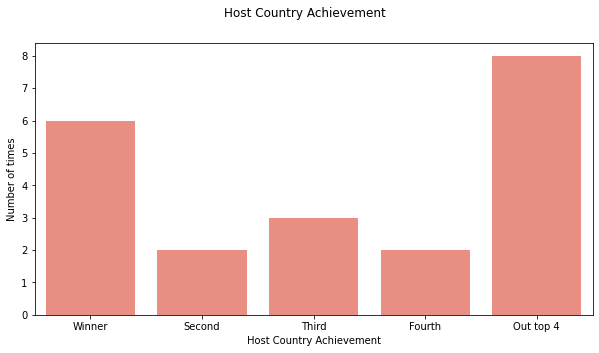

In [ ]:
#Quick view about how far home team going through
plt.figure(figsize=(10,5))
plt.suptitle('Host Country Achievement')


sns.barplot(data=hometeam_top4_data,
            x='HostCountryAchievement',
            y='Number of times',
            color='salmon')
plt.xlabel('Host Country Achievement')
plt.ylabel('Number of times')

plt.show()

In [ ]:
data_top4 = list(hometeam_top4_data[hometeam_top4_data['HostCountryAchievement'] != 'Out top 4']['Number of times'])
data_top4

[6, 2, 3, 2]

In [ ]:
label_top4 = list(hometeam_top4_data[hometeam_top4_data['HostCountryAchievement'] != 'Out top 4']['HostCountryAchievement'])
label_top4

['Winner', 'Second', 'Third', 'Fourth']

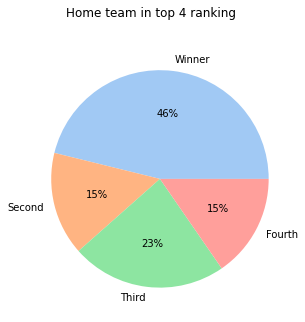

In [ ]:
#define Seaborn color palette to use
plt.figure(figsize=(10,5))
plt.suptitle('Home team in top 4 ranking')
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(data_top4, labels = label_top4, colors = colors, autopct='%.0f%%')
plt.show()

- Home sweet home champions

In [ ]:
wc[wc['Country']  == wc['Winner']]['Country'].value_counts()

France       1
Argentina    1
Uruguay      1
Germany      1
England      1
Italy        1
Name: Country, dtype: int64

We will want to discover about 'Not in top 4' category to see which match have made the home team to stop (Quarter final, Round of 16 or Group stage). 
In order to doing this, we need to link 2 tables up (World Cup and World Cup Matches) to see what happened in their adventure.

#Ready to discover more: 
- Join 2 tables: Matches and World Cup by 'Year' columns

In [ ]:
wc.rename(columns={'Attendance':'All_Attendance'},inplace=True)

In [ ]:
wc.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,Goals,Teams,Matches,All_Attendance,HostCountryAchievement
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,Winner
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,Winner
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,Out top 4
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,Second
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,Out top 4


In [ ]:
wc.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'Goals',
       'Teams', 'Matches', 'All_Attendance', 'HostCountryAchievement'],
      dtype='object')

In [ ]:
wc_col = ['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'All_Attendance', 'HostCountryAchievement']

In [ ]:
wc[wc_col]

,Year,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner
2,1938,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,768607,Out top 4
5,1958,Sweden,Brazil,Sweden,France,Germany,819810,Second
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,893172,Third
7,1966,England,England,Germany,Portugal,Soviet Union,1563135,Winner
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,1603975,Out top 4
9,1974,Germany,Germany,Netherlands,Poland,Brazil,1865753,Winner


In [ ]:
match_col = ['Year', 'Datetime', 'Stage', 'HomeName', 'HomeGoals', 'AwayGoals', 'AwayName', 'Attendance']

In [ ]:
match[match_col]

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance
0,1930,1930-07-13 15:00:00,Group,France,4,1,Mexico,4444
1,1930,1930-07-13 15:00:00,Group,USA,3,0,Belgium,18346
2,1930,1930-07-14 12:45:00,Group,Yugoslavia,2,1,Brazil,24059
3,1930,1930-07-14 14:50:00,Group,Romania,3,1,Peru,2549
4,1930,1930-07-15 16:00:00,Group,Argentina,1,0,France,23409
...,...,...,...,...,...,...,...,...
831,2014,2014-07-05 13:00:00,Quarter finals,Argentina,1,0,Belgium,68551
832,2014,2014-06-29 13:00:00,Round of 16,Netherlands,2,1,Mexico,58817
833,2014,2014-06-29 17:00:00,Round of 16,Costa Rica,1,1,Greece,41242
834,2014,2014-07-01 13:00:00,Round of 16,Argentina,1,0,Switzerland,63255


In [ ]:
wc_match = pd.merge(left=match[match_col],
                    right=wc[wc_col],
                    how='inner',
                    on='Year')

In [ ]:
#short code to save home team
host = list(wc_match['Country'].unique())
host

['Uruguay',
 'Italy',
 'France',
 'Brazil',
 'Switzerland',
 'Sweden',
 'Chile',
 'England',
 'Mexico',
 'Germany',
 'Argentina',
 'Spain',
 'USA',
 'Korea Republic',
 'Japan',
 'South Africa']

In [ ]:
#get all the match that the host country participate in
host_match = wc_match[(wc_match['Country'] == wc_match['HomeName']) | (wc_match['Country'] == wc_match['AwayName'])]

In [ ]:
host_match = host_match.sort_values(by='Datetime')

In [ ]:
host_match.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement
8,1930,1930-07-18 14:30:00,Group,Uruguay,1,0,Peru,57735,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner
13,1930,1930-07-21 14:50:00,Group,Uruguay,4,0,Romania,70022,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner
16,1930,1930-07-27 14:45:00,Semi finals,Uruguay,6,1,Yugoslavia,79867,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner
17,1930,1930-07-30 14:15:00,Final,Uruguay,4,2,Argentina,68346,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner
24,1934,1934-05-27 16:30:00,Round of 16,Italy,7,1,USA,25000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner


## Create a simple dictionary to save the best teams

In [ ]:
y_range = np.arange(0, 1.1, 0.2)
y_range

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
#we make a simple metrics to get a strong teams dictionary
strong_teams = {}
def check_strong_team(wc):
  for i in range(2,6):
    for j in range(wc.shape[0]):
      if wc.iloc[j,i] not in strong_teams.keys():
        if i == 1:
          strong_teams[wc.iloc[j,i]] = 4
        elif i == 2:
          strong_teams[wc.iloc[j,i]] = 3
        elif i == 3:
          strong_teams[wc.iloc[j,i]] = 2
        else:
          strong_teams[wc.iloc[j,i]] = 1
      elif wc.iloc[j,i] in strong_teams.keys():
        if i == 1:
          strong_teams[wc.iloc[j,i]] += 4
        elif i == 2:
          strong_teams[wc.iloc[j,i]] += 3
        elif i == 3:
          strong_teams[wc.iloc[j,i]] += 2
        else:
          strong_teams[wc.iloc[j,i]] += 1

check_strong_team(wc)
strong_teams

{'Argentina': 12,
 'Austria': 2,
 'Belgium': 1,
 'Brazil': 26,
 'Bulgaria': 1,
 'Chile': 1,
 'Croatia': 1,
 'Czechoslovakia': 4,
 'England': 4,
 'France': 8,
 'Germany': 27,
 'Hungary': 4,
 'Italy': 18,
 'Korea Republic': 2,
 'Netherlands': 8,
 'Poland': 2,
 'Portugal': 2,
 'Soviet Union': 1,
 'Spain': 4,
 'Sweden': 5,
 'Turkey': 2,
 'USA': 1,
 'Uruguay': 9,
 'Yugoslavia': 2}

In [ ]:
st_df = pd.Series(strong_teams, name='Points')
st_df = st_df.reset_index()
st_df.rename(columns={'index':'Country'}, inplace=True)
st_df

,Country,Points
0,Uruguay,9
1,Italy,18
2,Germany,27
3,Brazil,26
4,England,4
5,Argentina,12
6,France,8
7,Spain,4
8,Czechoslovakia,4
9,Hungary,4


In [ ]:
st_df = st_df.sort_values(by='Points', ascending=False).head(6)
st_df

,Country,Points
2,Germany,27
3,Brazil,26
1,Italy,18
5,Argentina,12
0,Uruguay,9
6,France,8


In [ ]:
strong_teams = list(st_df['Country'])
strong_teams

['Germany', 'Brazil', 'Italy', 'Argentina', 'Uruguay', 'France']

In [ ]:
host_top4 = list(hometeam_top4[hometeam_top4['Country'] != 'Not in top 4']['Country'].value_counts().index)
host_top4

['France',
 'Italy',
 'Germany',
 'Mexico',
 'Brazil',
 'Chile',
 'Korea Republic',
 'Switzerland',
 'Uruguay',
 'South Africa',
 'Spain',
 'USA',
 'England',
 'Argentina',
 'Japan',
 'Sweden']

In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
strong_host = intersection(strong_teams, host_top4)

In [ ]:
strong_host

['Germany', 'Brazil', 'Italy', 'Argentina', 'Uruguay', 'France']

## 5 strongest Home Team over the year (1930-2014)

---



### First team: Germany Adventure



In [ ]:
strong_host[0]

'Germany'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Germany matches*




In [ ]:
germany= wc_match[(wc_match['HomeName'] == strong_host[0]) | (wc_match['AwayName'] == strong_host[0])]
germany= germany[germany['Country'] != 'Japan'].sort_values(by='Datetime')

* *Collects Germany's result*

In [ ]:
def check_germany_result(row):
  if row['HomeName'] == strong_host[0]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == strong_host[0]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

germany['ger_result'] = germany.apply(check_germany_result, axis=1)
germany.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,ger_result
22,1934,1934-05-27 16:30:00,Round of 16,Germany,5,2,Belgium,8000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
27,1934,1934-05-31 16:30:00,Quarter finals,Germany,2,1,Sweden,3000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
32,1934,1934-06-03 16:30:00,Semi finals,Czechoslovakia,3,1,Germany,15000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose
33,1934,1934-06-07 18:00:00,Third place,Germany,3,2,Austria,7000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
35,1938,1938-06-04 17:00:00,Round of 16,Switzerland,1,1,Germany,27152,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw


In [ ]:
ger_dummies = pd.get_dummies(germany['ger_result'])
ger_dummies.head()

,Draw,Lose,Win
22,0,0,1
27,0,0,1
32,0,1,0
33,0,0,1
35,1,0,0


In [ ]:
full_ger = pd.concat([germany,ger_dummies], axis=1)
full_ger.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,ger_result,Draw,Lose,Win
22,1934,1934-05-27 16:30:00,Round of 16,Germany,5,2,Belgium,8000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
27,1934,1934-05-31 16:30:00,Quarter finals,Germany,2,1,Sweden,3000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
32,1934,1934-06-03 16:30:00,Semi finals,Czechoslovakia,3,1,Germany,15000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose,0,1,0
33,1934,1934-06-07 18:00:00,Third place,Germany,3,2,Austria,7000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
35,1938,1938-06-04 17:00:00,Round of 16,Switzerland,1,1,Germany,27152,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw,1,0,0


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_ger_goal_scored(row):
  if row['HomeName'] == strong_host[0]:
    return row['HomeGoals']
  elif row['AwayName'] == strong_host[0]:
    return row['AwayGoals']

In [ ]:
def check_ger_goal_conceded(row):
  if row['HomeName'] == strong_host[0]:
    return row['AwayGoals']
  elif row['AwayName'] == strong_host[0]:
    return row['HomeGoals']

In [ ]:
def check_ger_achievement(rows):
    if rows['Winner'] == strong_host[0]:
      return 'Winner'
    elif rows['Runners-Up'] == strong_host[0]:
      return 'Second'
    elif rows['Third'] == strong_host[0]:
      return 'Third'
    elif rows['Fourth'] == strong_host[0]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_ger['GoalScored'] = full_ger.apply(check_ger_goal_scored, axis=1)
full_ger['GoalConceded'] = full_ger.apply(check_ger_goal_conceded, axis=1)
full_ger['Achievement'] = full_ger.apply(check_ger_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_ger = full_ger.groupby('Year').agg(col_agg)
stat_ger['Team'] = strong_host[0]
stat_ger.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_ger['Ger_Achievement'] = full_ger.groupby('Year').tail(1)['Achievement'].values
stat_ger['LastStage'] = full_ger.groupby('Year').tail(1)['Stage'].values

In [ ]:
def check_ger_last_opponent(row):
  if row['HomeName'] == strong_host[0]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_ger['LastOpponent'] = full_ger.groupby('Year').tail(1).apply(check_ger_last_opponent,axis=1).values

In [ ]:
stat_ger['GoalDifference'] = stat_ger['GoalScored'] - stat_ger['GoalConceded']
stat_ger['WinRate'] = stat_ger['Win'] / stat_ger['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_ger

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Ger_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1934,4,3,0,1,11,8,Germany,Third,Third place,Austria,3,0.75
1938,2,0,1,1,3,5,Germany,Out top 4,Round of 16,Switzerland,-2,0.00
1954,6,5,0,1,25,14,Germany,Winner,Final,Hungary,11,0.83
1958,6,2,2,2,12,14,Germany,Fourth,Third place,France,-2,0.33
1962,4,2,1,1,4,2,Germany,Out top 4,Quarter finals,Yugoslavia,2,0.50
1966,6,4,1,1,15,6,Germany,Second,Final,England,9,0.67
1970,6,5,0,1,17,10,Germany,Third,Third place,Uruguay,7,0.83
1974,7,6,0,1,13,4,Germany,Winner,Final,Netherlands,9,0.86
1978,6,1,4,1,10,5,Germany,Out top 4,Group,Austria,5,0.17


* *Prepare data to plot*

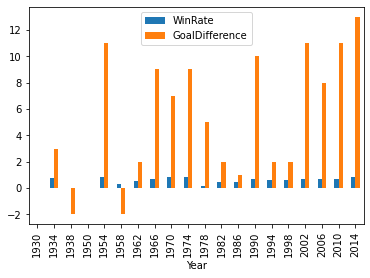

In [ ]:
ger_wr_gd = stat_ger[['WinRate','GoalDifference','Ger_Achievement']]
ger_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=ger_wr_gd, on='Year', how='left').set_index('Year')
ger_wr_gd.plot(kind='bar')

In [ ]:
ger_wr_gd['WinRate'] = ger_wr_gd['WinRate'].fillna(0)

In [ ]:
ger_wr_gd['Ger_Achievement'] = ger_wr_gd['Ger_Achievement'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == strong_host[0]:
    return 'Host'
  else:
    return 'Guest'

ger_wr_gd['Status'] = ger_wr_gd.apply(check_status, axis=1)
ger_wr_gd

,Country,WinRate,GoalDifference,Ger_Achievement,Status
Year,,,,,
1930,Uruguay,0.00,nan,,Guest
1934,Italy,0.75,3.00,Third,Guest
1938,France,0.00,-2.00,Out top 4,Guest
1950,Brazil,0.00,nan,,Guest
1954,Switzerland,0.83,11.00,Winner,Guest
1958,Sweden,0.33,-2.00,Fourth,Guest
1962,Chile,0.50,2.00,Out top 4,Guest
1966,England,0.67,9.00,Second,Guest
1970,Mexico,0.83,7.00,Third,Guest


In [ ]:
idx = ger_wr_gd.index
vals = ger_wr_gd.values
plot_vals = [i[1] for i in vals]
achv_vals = [i[3] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

In [ ]:
colors

['silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'navy',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'navy',
 'silver',
 'silver']

In [ ]:
print((idx[0]), plot_vals[0], achv_vals[0])

1930 0.0 


In [ ]:
print(len(idx), len(plot_vals), len(achv_vals))

20 20 20


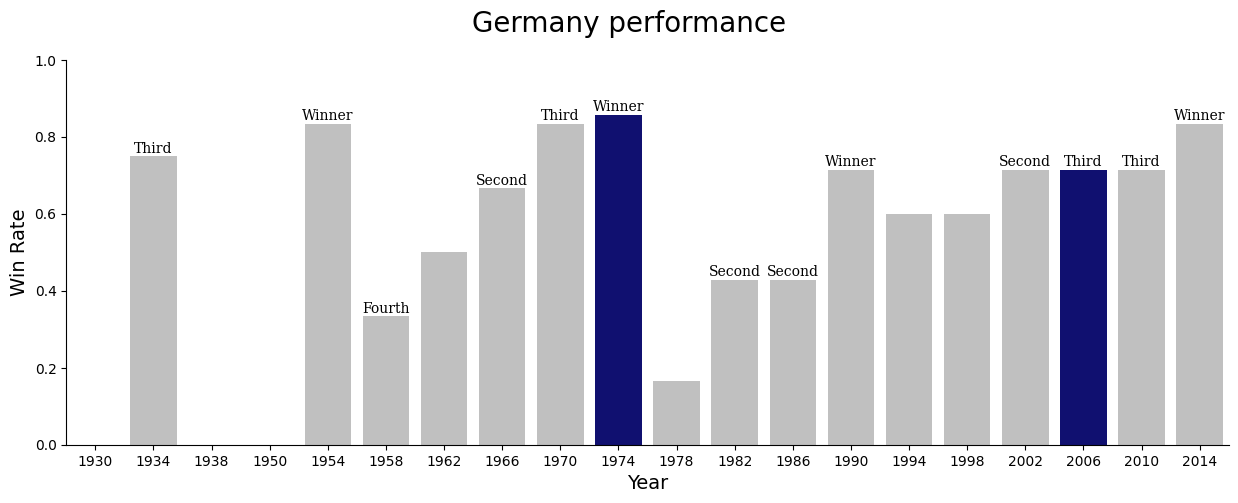

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{strong_host[0]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  if (achv_vals[i] != 'Out top 4') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.02, achv_vals[i], ha='center', va='center', family='serif', size='medium')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.yticks(y_range)
plt.savefig(f'{strong_host[0]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Second team: Brazil Adventure



In [ ]:
strong_host[1]

'Brazil'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Brazil matches*




In [ ]:
brazil = wc_match[(wc_match['HomeName'] == strong_host[1]) | (wc_match['AwayName'] == strong_host[1])]
brazil = brazil[brazil['Country'] != 'Japan'].sort_values(by='Datetime')

* *Collects Brazil's result*

In [ ]:
def check_brazil_result(row):
  if row['HomeName'] == strong_host[1]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == strong_host[1]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

brazil['bra_result'] = brazil.apply(check_brazil_result, axis=1)
brazil.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,bra_result
2,1930,1930-07-14 12:45:00,Group,Yugoslavia,2,1,Brazil,24059,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose
11,1930,1930-07-20 13:00:00,Group,Brazil,4,0,Bolivia,25466,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
23,1934,1934-05-27 16:30:00,Round of 16,Spain,3,1,Brazil,21000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose
40,1938,1938-06-05 17:30:00,Round of 16,Brazil,6,5,Poland,13452,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Win
44,1938,1938-06-12 17:00:00,Quarter finals,Brazil,1,1,Czechoslovakia,22021,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw


In [ ]:
bra_dummies = pd.get_dummies(brazil['bra_result'])
bra_dummies.head()

,Draw,Lose,Win
2,0,1,0
11,0,0,1
23,0,1,0
40,0,0,1
44,1,0,0


In [ ]:
full_bra = pd.concat([brazil,bra_dummies], axis=1)
full_bra.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,bra_result,Draw,Lose,Win
2,1930,1930-07-14 12:45:00,Group,Yugoslavia,2,1,Brazil,24059,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose,0,1,0
11,1930,1930-07-20 13:00:00,Group,Brazil,4,0,Bolivia,25466,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
23,1934,1934-05-27 16:30:00,Round of 16,Spain,3,1,Brazil,21000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose,0,1,0
40,1938,1938-06-05 17:30:00,Round of 16,Brazil,6,5,Poland,13452,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Win,0,0,1
44,1938,1938-06-12 17:00:00,Quarter finals,Brazil,1,1,Czechoslovakia,22021,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw,1,0,0


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_bra_goal_scored(row):
  if row['HomeName'] == strong_host[1]:
    return row['HomeGoals']
  elif row['AwayName'] == strong_host[1]:
    return row['AwayGoals']

In [ ]:
def check_bra_goal_conceded(row):
  if row['HomeName'] == strong_host[1]:
    return row['AwayGoals']
  elif row['AwayName'] == strong_host[1]:
    return row['HomeGoals']

In [ ]:
def check_bra_achievement(rows):
    if rows['Winner'] == strong_host[1]:
      return 'Winner'
    elif rows['Runners-Up'] == strong_host[1]:
      return 'Second'
    elif rows['Third'] == strong_host[1]:
      return 'Third'
    elif rows['Fourth'] == strong_host[1]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_bra['GoalScored'] = full_bra.apply(check_bra_goal_scored, axis=1)
full_bra['GoalConceded'] = full_bra.apply(check_bra_goal_conceded, axis=1)
full_bra['Achievement'] = full_bra.apply(check_bra_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_bra = full_bra.groupby('Year').agg(col_agg)
stat_bra['Team'] = strong_host[1]
stat_bra.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_bra['Bra_Achievement'] = full_bra.groupby('Year').tail(1)['Achievement'].values
stat_bra['LastStage'] = full_bra.groupby('Year').tail(1)['Stage'].values

In [ ]:
def check_bra_last_opponent(row):
  if row['HomeName'] == strong_host[1]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_bra['LastOpponent'] = full_bra.groupby('Year').tail(1).apply(check_bra_last_opponent,axis=1).values

In [ ]:
stat_bra['GoalDifference'] = stat_bra['GoalScored'] - stat_bra['GoalConceded']
stat_bra['WinRate'] = stat_bra['Win'] / stat_bra['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_bra

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Bra_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1930,2,1,0,1,5,2,Brazil,Out top 4,Group,Bolivia,3,0.50
1934,1,0,0,1,1,3,Brazil,Out top 4,Round of 16,Spain,-2,0.00
1938,5,3,1,1,14,11,Brazil,Third,Third place,Sweden,3,0.60
1950,6,4,1,1,22,6,Brazil,Second,Group,Uruguay,16,0.67
1954,3,1,1,1,8,5,Brazil,Out top 4,Quarter finals,Hungary,3,0.33
1958,6,5,1,0,16,4,Brazil,Winner,Final,Sweden,12,0.83
1962,6,5,1,0,14,5,Brazil,Winner,Final,Czechoslovakia,9,0.83
1966,3,1,0,2,4,6,Brazil,Out top 4,Group,Portugal,-2,0.33
1970,6,6,0,0,19,7,Brazil,Winner,Final,Italy,12,1.00


* *Prepare data to plot*

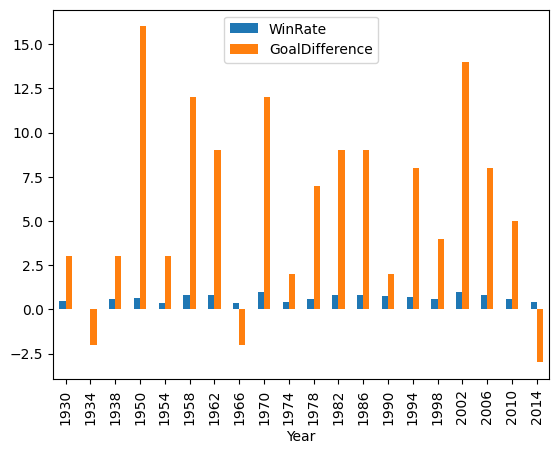

In [ ]:
bra_wr_gd = stat_bra[['WinRate','GoalDifference','Bra_Achievement']]
bra_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=bra_wr_gd, on='Year', how='left').set_index('Year')
bra_wr_gd.plot(kind='bar')

In [ ]:
bra_wr_gd['WinRate'] = bra_wr_gd['WinRate'].fillna(0)

In [ ]:
bra_wr_gd['Bra_Achievement'] = bra_wr_gd['Bra_Achievement'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == strong_host[1]:
    return 'Host'
  else:
    return 'Guest'

bra_wr_gd['Status'] = bra_wr_gd.apply(check_status, axis=1)
bra_wr_gd

,Country,WinRate,GoalDifference,Bra_Achievement,Status
Year,,,,,
1930,Uruguay,0.50,3,Out top 4,Guest
1934,Italy,0.00,-2,Out top 4,Guest
1938,France,0.60,3,Third,Guest
1950,Brazil,0.67,16,Second,Host
1954,Switzerland,0.33,3,Out top 4,Guest
1958,Sweden,0.83,12,Winner,Guest
1962,Chile,0.83,9,Winner,Guest
1966,England,0.33,-2,Out top 4,Guest
1970,Mexico,1.00,12,Winner,Guest


In [ ]:
idx = bra_wr_gd.index
vals = bra_wr_gd.values
plot_vals = [i[1] for i in vals]
achv_vals = [i[3] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

In [ ]:
print((idx[0]), plot_vals[0], achv_vals[0])

1930 0.5 Out top 4


In [ ]:
print(len(idx), len(plot_vals), len(achv_vals))

20 20 20


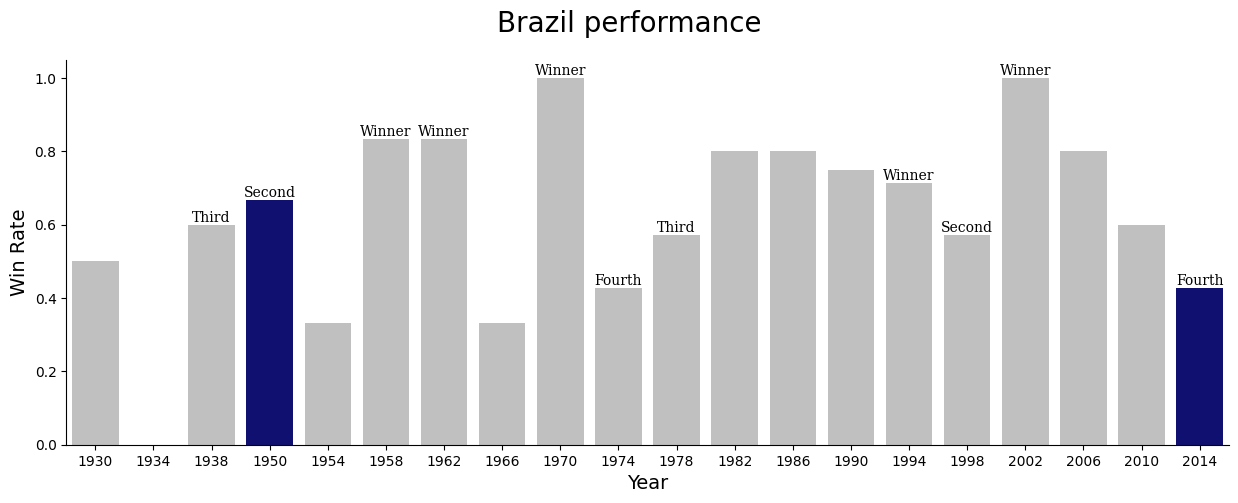

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{strong_host[1]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  if (achv_vals[i] != 'Out top 4') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.02, achv_vals[i], ha='center', va='center', family='serif', size='medium')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.savefig(f'{strong_host[1]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Third team: Italy Adventure




In [ ]:
strong_host[2]

'Italy'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Italy matches*




In [ ]:
italy = wc_match[(wc_match['HomeName'] == strong_host[2]) | (wc_match['AwayName'] == strong_host[2])]
italy = italy[italy['Country'] != 'Japan'].sort_values(by='Datetime')

* *Collects Italy's result*

In [ ]:
def check_italy_result(row):
  if row['HomeName'] == strong_host[2]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == strong_host[2]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

italy['ita_result'] = italy.apply(check_italy_result, axis=1)
italy.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,ita_result
24,1934,1934-05-27 16:30:00,Round of 16,Italy,7,1,USA,25000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
28,1934,1934-05-31 16:30:00,Quarter finals,Italy,1,1,Spain,35000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Draw
30,1934,1934-06-01 16:30:00,Quarter finals,Italy,1,0,Spain,43000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
31,1934,1934-06-03 16:30:00,Semi finals,Italy,1,0,Austria,35000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
34,1934,1934-06-10 17:30:00,Final,Italy,2,1,Czechoslovakia,55000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win


In [ ]:
ita_dummies = pd.get_dummies(italy['ita_result'])
ita_dummies.head()

,Draw,Lose,Win
24,0,0,1
28,1,0,0
30,0,0,1
31,0,0,1
34,0,0,1


In [ ]:
full_ita = pd.concat([italy,ita_dummies], axis=1)
full_ita.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,ita_result,Draw,Lose,Win
24,1934,1934-05-27 16:30:00,Round of 16,Italy,7,1,USA,25000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
28,1934,1934-05-31 16:30:00,Quarter finals,Italy,1,1,Spain,35000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Draw,1,0,0
30,1934,1934-06-01 16:30:00,Quarter finals,Italy,1,0,Spain,43000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
31,1934,1934-06-03 16:30:00,Semi finals,Italy,1,0,Austria,35000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
34,1934,1934-06-10 17:30:00,Final,Italy,2,1,Czechoslovakia,55000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_ita_goal_scored(row):
  if row['HomeName'] == strong_host[2]:
    return row['HomeGoals']
  elif row['AwayName'] == strong_host[2]:
    return row['AwayGoals']

In [ ]:
def check_ita_goal_conceded(row):
  if row['HomeName'] == strong_host[2]:
    return row['AwayGoals']
  elif row['AwayName'] == strong_host[2]:
    return row['HomeGoals']

In [ ]:
def check_ita_achievement(rows):
    if rows['Winner'] == strong_host[2]:
      return 'Winner'
    elif rows['Runners-Up'] == strong_host[2]:
      return 'Second'
    elif rows['Third'] == strong_host[2]:
      return 'Third'
    elif rows['Fourth'] == strong_host[2]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_ita['GoalScored'] = full_ita.apply(check_ita_goal_scored, axis=1)
full_ita['GoalConceded'] = full_ita.apply(check_ita_goal_conceded, axis=1)
full_ita['Achievement'] = full_ita.apply(check_ita_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_ita = full_ita.groupby('Year').agg(col_agg)
stat_ita['Team'] = strong_host[2]
stat_ita.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_ita['Ita_Achievement'] = full_ita.groupby('Year').tail(1)['Achievement'].values
stat_ita['LastStage'] = full_ita.groupby('Year').tail(1)['Stage'].values

In [ ]:
def check_ita_last_opponent(row):
  if row['HomeName'] == strong_host[2]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_ita['LastOpponent'] = full_ita.groupby('Year').tail(1).apply(check_ita_last_opponent,axis=1).values

In [ ]:
stat_ita['GoalDifference'] = stat_ita['GoalScored'] - stat_ita['GoalConceded']
stat_ita['WinRate'] = stat_ita['Win'] / stat_ita['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_ita

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Ita_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1934,5,4,1,0,12,3,Italy,Winner,Final,Czechoslovakia,9,0.80
1938,4,4,0,0,11,5,Italy,Winner,Final,Hungary,6,1.00
1950,2,1,0,1,4,3,Italy,Out top 4,Group,Paraguay,1,0.50
1954,3,1,0,2,6,7,Italy,Out top 4,Group,Switzerland,-1,0.33
1962,3,1,1,1,3,2,Italy,Out top 4,Group,Switzerland,1,0.33
1966,3,1,0,2,2,2,Italy,Out top 4,Group,Korea DPR,0,0.33
1970,6,3,2,1,10,8,Italy,Second,Final,Brazil,2,0.50
1974,3,1,1,1,5,4,Italy,Out top 4,Group,Poland,1,0.33
1978,7,4,1,2,9,6,Italy,Fourth,Third place,Brazil,3,0.57


* *Prepare data to plot*

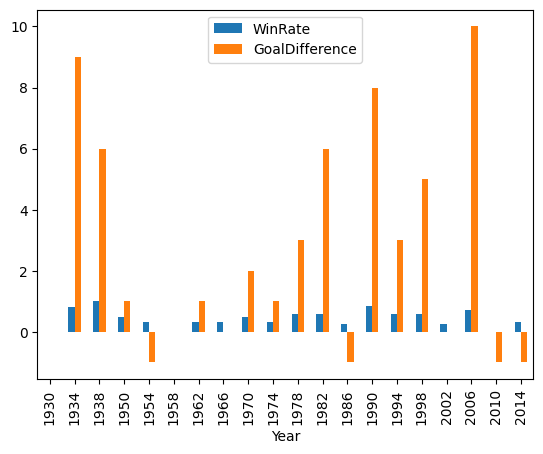

In [ ]:
ita_wr_gd = stat_ita[['WinRate','GoalDifference','Ita_Achievement']]
ita_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=ita_wr_gd, on='Year', how='left').set_index('Year')
ita_wr_gd.plot(kind='bar')

In [ ]:
ita_wr_gd['WinRate'] = ita_wr_gd['WinRate'].fillna(0)

In [ ]:
ita_wr_gd['Ita_Achievement'] = ita_wr_gd['Ita_Achievement'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == strong_host[2]:
    return 'Host'
  else:
    return 'Guest'

ita_wr_gd['Status'] = ita_wr_gd.apply(check_status, axis=1)
ita_wr_gd

,Country,WinRate,GoalDifference,Ita_Achievement,Status
Year,,,,,
1930,Uruguay,0.00,nan,,Guest
1934,Italy,0.80,9.00,Winner,Host
1938,France,1.00,6.00,Winner,Guest
1950,Brazil,0.50,1.00,Out top 4,Guest
1954,Switzerland,0.33,-1.00,Out top 4,Guest
1958,Sweden,0.00,nan,,Guest
1962,Chile,0.33,1.00,Out top 4,Guest
1966,England,0.33,0.00,Out top 4,Guest
1970,Mexico,0.50,2.00,Second,Guest


In [ ]:
idx = ita_wr_gd.index
vals = ita_wr_gd.values
plot_vals = [i[1] for i in vals]
achv_vals = [i[3] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

In [ ]:
print((idx[0]), plot_vals[0], achv_vals[0])

1930 0.0 


In [ ]:
print(len(idx), len(plot_vals), len(achv_vals))

20 20 20


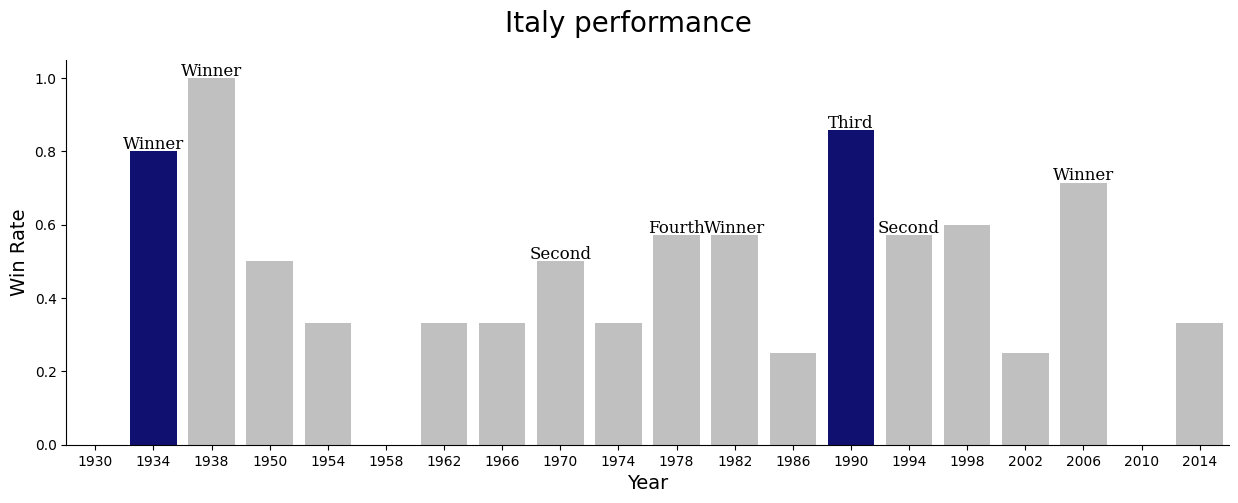

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{strong_host[2]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  if (achv_vals[i] != 'Out top 4') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.02, achv_vals[i], ha='center', va='center', family='serif', size='large')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.savefig(f'{strong_host[2]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Fourth team: Argentina Adventure




In [ ]:
strong_host[3]

'Argentina'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Argentina's matches*




In [ ]:
argentina = wc_match[(wc_match['HomeName'] == strong_host[3]) | (wc_match['AwayName'] == strong_host[3])]
argentina = argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Collects Argentina's result*

In [ ]:
def check_argentina_result(row):
  if row['HomeName'] == strong_host[3]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == strong_host[3]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

argentina['arg_result'] = argentina.apply(check_argentina_result, axis=1)
argentina.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,arg_result
4,1930,1930-07-15 16:00:00,Group,Argentina,1,0,France,23409,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
10,1930,1930-07-19 15:00:00,Group,Argentina,6,3,Mexico,42100,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
14,1930,1930-07-22 14:45:00,Group,Argentina,3,1,Chile,41459,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
15,1930,1930-07-26 14:45:00,Semi finals,Argentina,6,1,USA,72886,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
17,1930,1930-07-30 14:15:00,Final,Uruguay,4,2,Argentina,68346,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose


In [ ]:
arg_dummies = pd.get_dummies(argentina['arg_result'])
arg_dummies.head()

,Draw,Lose,Win
4,0,0,1
10,0,0,1
14,0,0,1
15,0,0,1
17,0,1,0


In [ ]:
full_arg = pd.concat([argentina,arg_dummies], axis=1)
full_arg.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,arg_result,Draw,Lose,Win
4,1930,1930-07-15 16:00:00,Group,Argentina,1,0,France,23409,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
10,1930,1930-07-19 15:00:00,Group,Argentina,6,3,Mexico,42100,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
14,1930,1930-07-22 14:45:00,Group,Argentina,3,1,Chile,41459,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
15,1930,1930-07-26 14:45:00,Semi finals,Argentina,6,1,USA,72886,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
17,1930,1930-07-30 14:15:00,Final,Uruguay,4,2,Argentina,68346,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose,0,1,0


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_arg_goal_scored(row):
  if row['HomeName'] == strong_host[3]:
    return row['HomeGoals']
  elif row['AwayName'] == strong_host[3]:
    return row['AwayGoals']

In [ ]:
def check_arg_goal_conceded(row):
  if row['HomeName'] == strong_host[3]:
    return row['AwayGoals']
  elif row['AwayName'] == strong_host[3]:
    return row['HomeGoals']

In [ ]:
def check_arg_achievement(rows):
    if rows['Winner'] == strong_host[3]:
      return 'Winner'
    elif rows['Runners-Up'] == strong_host[3]:
      return 'Second'
    elif rows['Third'] == strong_host[3]:
      return 'Third'
    elif rows['Fourth'] == strong_host[3]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_arg['GoalScored'] = full_arg.apply(check_arg_goal_scored, axis=1)
full_arg['GoalConceded'] = full_arg.apply(check_arg_goal_conceded, axis=1)
full_arg['Achievement'] = full_arg.apply(check_arg_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_arg = full_arg.groupby('Year').agg(col_agg)
stat_arg['Team'] = strong_host[3]
stat_arg.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_arg['Arg_Achievement'] = full_arg.groupby('Year').tail(1)['Achievement'].values
stat_arg['LastStage'] = full_arg.groupby('Year').tail(1)['Stage'].values

In [ ]:
def check_arg_last_opponent(row):
  if row['HomeName'] == strong_host[3]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_arg['LastOpponent'] = full_arg.groupby('Year').tail(1).apply(check_arg_last_opponent,axis=1).values

In [ ]:
stat_arg['GoalDifference'] = stat_arg['GoalScored'] - stat_arg['GoalConceded']
stat_arg['WinRate'] = stat_arg['Win'] / stat_arg['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_arg

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Arg_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1930,5,4,0,1,18,9,Argentina,Second,Final,Uruguay,9,0.80
1934,1,0,0,1,2,3,Argentina,Out top 4,Round of 16,Sweden,-1,0.00
1958,3,1,0,2,5,10,Argentina,Out top 4,Group,Czechoslovakia,-5,0.33
1962,3,1,1,1,2,3,Argentina,Out top 4,Group,Hungary,-1,0.33
1966,4,2,1,1,4,2,Argentina,Out top 4,Quarter finals,England,2,0.50
1974,6,1,2,3,9,12,Argentina,Out top 4,Group,German DR,-3,0.17
1978,7,5,1,1,15,4,Argentina,Winner,Final,Netherlands,11,0.71
1982,5,2,0,3,8,7,Argentina,Out top 4,Group,Brazil,1,0.40
1986,7,6,1,0,14,5,Argentina,Winner,Final,Germany,9,0.86


* *Prepare data to plot*

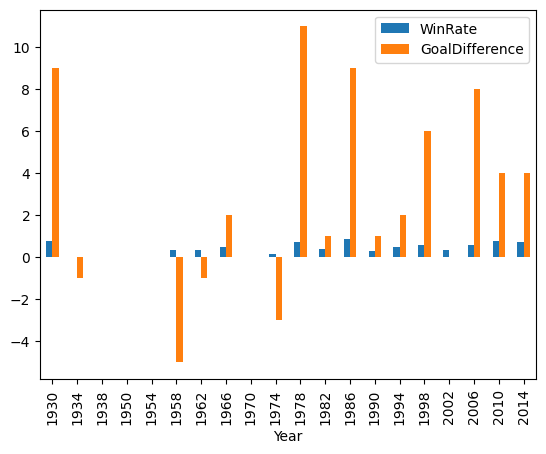

In [ ]:
arg_wr_gd = stat_arg[['WinRate','GoalDifference','Arg_Achievement']]
arg_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=arg_wr_gd, on='Year', how='left').set_index('Year')
arg_wr_gd.plot(kind='bar')

In [ ]:
arg_wr_gd['WinRate'] = arg_wr_gd['WinRate'].fillna(0)

In [ ]:
arg_wr_gd['Arg_Achievement'] = arg_wr_gd['Arg_Achievement'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == strong_host[3]:
    return 'Host'
  else:
    return 'Guest'

arg_wr_gd['Status'] = arg_wr_gd.apply(check_status, axis=1)
arg_wr_gd

,Country,WinRate,GoalDifference,Arg_Achievement,Status
Year,,,,,
1930,Uruguay,0.80,9.00,Second,Guest
1934,Italy,0.00,-1.00,Out top 4,Guest
1938,France,0.00,nan,,Guest
1950,Brazil,0.00,nan,,Guest
1954,Switzerland,0.00,nan,,Guest
1958,Sweden,0.33,-5.00,Out top 4,Guest
1962,Chile,0.33,-1.00,Out top 4,Guest
1966,England,0.50,2.00,Out top 4,Guest
1970,Mexico,0.00,nan,,Guest


In [ ]:
idx = arg_wr_gd.index
vals = arg_wr_gd.values
plot_vals = [i[1] for i in vals]
achv_vals = [i[3] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

In [ ]:
print((idx[0]), plot_vals[0], achv_vals[0])

1930 0.8 Second


In [ ]:
print(len(idx), len(plot_vals), len(achv_vals))

20 20 20


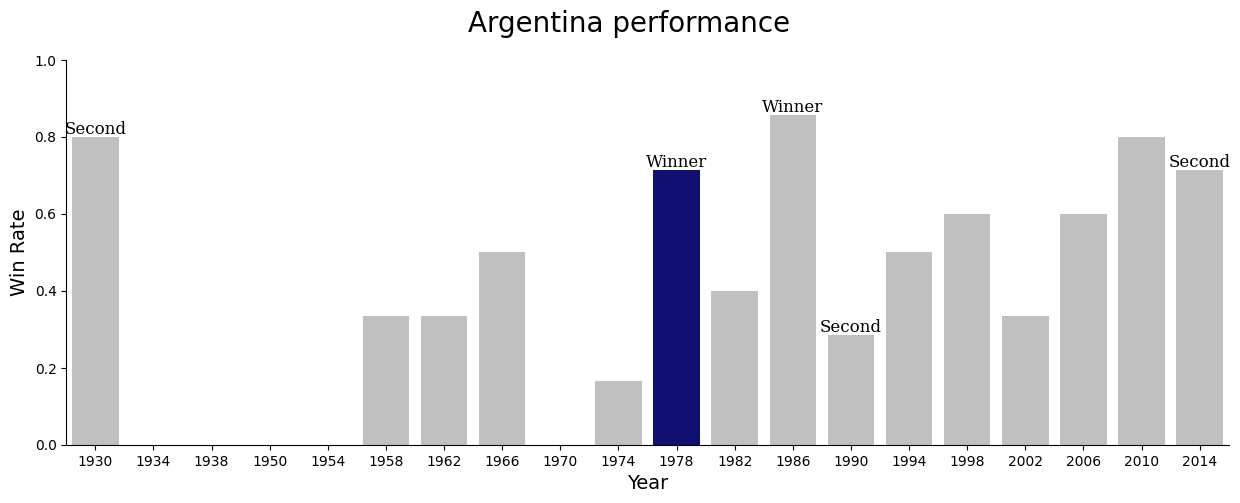

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{strong_host[3]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  if (achv_vals[i] != 'Out top 4') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.02, achv_vals[i], ha='center', va='center', family='serif', size='large')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.yticks(y_range)
plt.savefig(f'{strong_host[3]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Fifth team: Uruguay Adventure




In [ ]:
strong_host[4]

'Uruguay'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Uruguay's matches*




In [ ]:
uruguay = wc_match[(wc_match['HomeName'] == strong_host[4]) | (wc_match['AwayName'] == strong_host[4])]
uruguay = uruguay[uruguay['Country'] != 'Japan'].sort_values(by='Datetime')

* *Collects Uruguay's result*

In [ ]:
def check_uruguay_result(row):
  if row['HomeName'] == strong_host[4]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == strong_host[4]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

uruguay['uru_result'] = uruguay.apply(check_uruguay_result, axis=1)
uruguay.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,uru_result
8,1930,1930-07-18 14:30:00,Group,Uruguay,1,0,Peru,57735,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
13,1930,1930-07-21 14:50:00,Group,Uruguay,4,0,Romania,70022,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
16,1930,1930-07-27 14:45:00,Semi finals,Uruguay,6,1,Yugoslavia,79867,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
17,1930,1930-07-30 14:15:00,Final,Uruguay,4,2,Argentina,68346,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win
66,1950,1950-07-02 15:00:00,Group,Uruguay,8,0,Bolivia,5284,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Win


In [ ]:
uru_dummies = pd.get_dummies(uruguay['uru_result'])
uru_dummies.head()

,Draw,Lose,Win
8,0,0,1
13,0,0,1
16,0,0,1
17,0,0,1
66,0,0,1


In [ ]:
full_uru = pd.concat([uruguay,uru_dummies], axis=1)
full_uru.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,uru_result,Draw,Lose,Win
8,1930,1930-07-18 14:30:00,Group,Uruguay,1,0,Peru,57735,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
13,1930,1930-07-21 14:50:00,Group,Uruguay,4,0,Romania,70022,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
16,1930,1930-07-27 14:45:00,Semi finals,Uruguay,6,1,Yugoslavia,79867,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
17,1930,1930-07-30 14:15:00,Final,Uruguay,4,2,Argentina,68346,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Win,0,0,1
66,1950,1950-07-02 15:00:00,Group,Uruguay,8,0,Bolivia,5284,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Win,0,0,1


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_uru_goal_scored(row):
  if row['HomeName'] == strong_host[4]:
    return row['HomeGoals']
  elif row['AwayName'] == strong_host[4]:
    return row['AwayGoals']

In [ ]:
def check_uru_goal_conceded(row):
  if row['HomeName'] == strong_host[4]:
    return row['AwayGoals']
  elif row['AwayName'] == strong_host[4]:
    return row['HomeGoals']

In [ ]:
def check_uru_achievement(rows):
    if rows['Winner'] == strong_host[4]:
      return 'Winner'
    elif rows['Runners-Up'] == strong_host[4]:
      return 'Second'
    elif rows['Third'] == strong_host[4]:
      return 'Third'
    elif rows['Fourth'] == strong_host[4]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_uru['GoalScored'] = full_uru.apply(check_uru_goal_scored, axis=1)
full_uru['GoalConceded'] = full_uru.apply(check_uru_goal_conceded, axis=1)
full_uru['Achievement'] = full_uru.apply(check_uru_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_uru = full_uru.groupby('Year').agg(col_agg)
stat_uru['Team'] = strong_host[4]
stat_uru.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_uru['Uru_Achievement'] = full_uru.groupby('Year').tail(1)['Achievement'].values
stat_uru['LastStage'] = full_uru.groupby('Year').tail(1)['Stage'].values

In [ ]:
def check_uru_last_opponent(row):
  if row['HomeName'] == strong_host[4]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_uru['LastOpponent'] = full_uru.groupby('Year').tail(1).apply(check_uru_last_opponent,axis=1).values

In [ ]:
stat_uru['GoalDifference'] = stat_uru['GoalScored'] - stat_uru['GoalConceded']
stat_uru['WinRate'] = stat_uru['Win'] / stat_uru['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_uru

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Uru_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1930,4,4,0,0,15,3,Uruguay,Winner,Final,Argentina,12,1.00
1950,4,3,1,0,15,5,Uruguay,Winner,Group,Brazil,10,0.75
1954,5,3,0,2,16,9,Uruguay,Fourth,Third place,Austria,7,0.60
1962,3,1,0,2,4,6,Uruguay,Out top 4,Group,Soviet Union,-2,0.33
1966,4,1,2,1,2,5,Uruguay,Out top 4,Quarter finals,Germany,-3,0.25
1970,6,2,1,3,4,5,Uruguay,Fourth,Third place,Germany,-1,0.33
1974,3,0,1,2,1,6,Uruguay,Out top 4,Group,Sweden,-5,0.00
1986,4,0,2,2,2,8,Uruguay,Out top 4,Round of 16,Argentina,-6,0.00
1990,4,1,1,2,2,5,Uruguay,Out top 4,Round of 16,Italy,-3,0.25


* *Prepare data to plot*

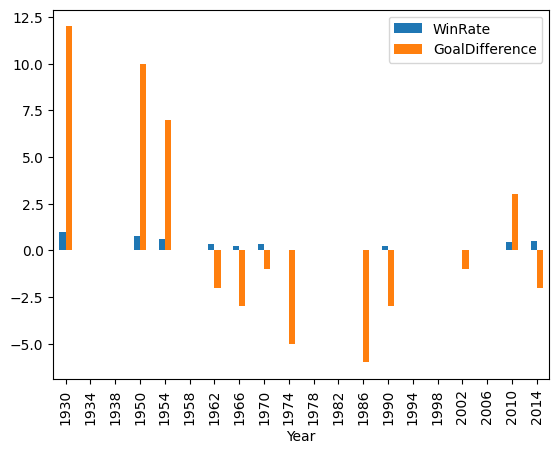

In [ ]:
uru_wr_gd = stat_uru[['WinRate','GoalDifference','Uru_Achievement']]
uru_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=uru_wr_gd, on='Year', how='left').set_index('Year')
uru_wr_gd.plot(kind='bar')

In [ ]:
uru_wr_gd['WinRate'] = uru_wr_gd['WinRate'].fillna(0)

In [ ]:
uru_wr_gd['Uru_Achievement'] = uru_wr_gd['Uru_Achievement'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == strong_host[4]:
    return 'Host'
  else:
    return 'Guest'

uru_wr_gd['Status'] = uru_wr_gd.apply(check_status, axis=1)
uru_wr_gd

,Country,WinRate,GoalDifference,Uru_Achievement,Status
Year,,,,,
1930,Uruguay,1.00,12.00,Winner,Host
1934,Italy,0.00,nan,,Guest
1938,France,0.00,nan,,Guest
1950,Brazil,0.75,10.00,Winner,Guest
1954,Switzerland,0.60,7.00,Fourth,Guest
1958,Sweden,0.00,nan,,Guest
1962,Chile,0.33,-2.00,Out top 4,Guest
1966,England,0.25,-3.00,Out top 4,Guest
1970,Mexico,0.33,-1.00,Fourth,Guest


In [ ]:
idx = uru_wr_gd.index
vals = uru_wr_gd.values
plot_vals = [i[1] for i in vals]
achv_vals = [i[3] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

In [ ]:
print((idx[0]), plot_vals[0], achv_vals[0])

1930 1.0 Winner


In [ ]:
print(len(idx), len(plot_vals), len(achv_vals))

20 20 20


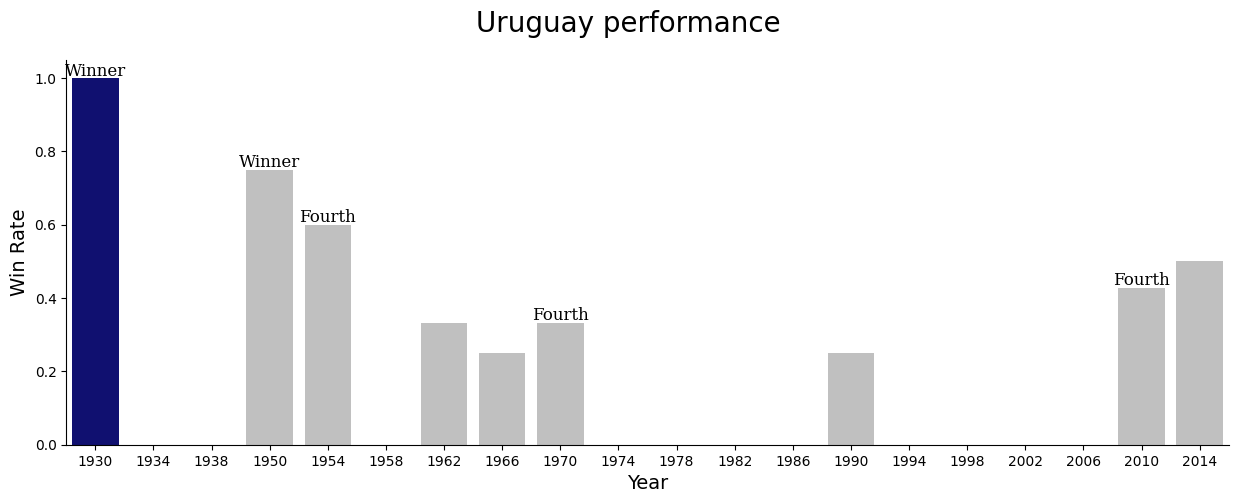

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{strong_host[4]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  if (achv_vals[i] != 'Out top 4') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.02, achv_vals[i], ha='center', va='center', family='serif', size='large')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.savefig(f'{strong_host[4]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

## Home team couldn't make it to the top 4. Why?

In [ ]:
hometeam_not_in_top4 = list(wc[wc['HostCountryAchievement'] == 'Out top 4']['Country'].value_counts().index)
hometeam_not_in_top4

['Mexico', 'Spain', 'USA', 'Switzerland', 'France', 'Japan', 'South Africa']

In [ ]:
ranking_teams = {}
def check_strong_team(wc):
  for i in range(2,6):
    for j in range(wc.shape[0]):
      if wc.iloc[j,i] not in ranking_teams.keys():
        if i == 1:
          ranking_teams[wc.iloc[j,i]] = 4
        elif i == 2:
          ranking_teams[wc.iloc[j,i]] = 3
        elif i == 3:
          ranking_teams[wc.iloc[j,i]] = 2
        else:
          ranking_teams[wc.iloc[j,i]] = 1
      elif wc.iloc[j,i] in ranking_teams.keys():
        if i == 1:
          ranking_teams[wc.iloc[j,i]] += 4
        elif i == 2:
          ranking_teams[wc.iloc[j,i]] += 3
        elif i == 3:
          ranking_teams[wc.iloc[j,i]] += 2
        else:
          ranking_teams[wc.iloc[j,i]] += 1

check_strong_team(wc)
ranking_teams

{'Argentina': 12,
 'Austria': 2,
 'Belgium': 1,
 'Brazil': 26,
 'Bulgaria': 1,
 'Chile': 1,
 'Croatia': 1,
 'Czechoslovakia': 4,
 'England': 4,
 'France': 8,
 'Germany': 27,
 'Hungary': 4,
 'Italy': 18,
 'Korea Republic': 2,
 'Netherlands': 8,
 'Poland': 2,
 'Portugal': 2,
 'Soviet Union': 1,
 'Spain': 4,
 'Sweden': 5,
 'Turkey': 2,
 'USA': 1,
 'Uruguay': 9,
 'Yugoslavia': 2}

In [ ]:
list(ranking_teams.keys())

['Uruguay',
 'Italy',
 'Germany',
 'Brazil',
 'England',
 'Argentina',
 'France',
 'Spain',
 'Czechoslovakia',
 'Hungary',
 'Sweden',
 'Netherlands',
 'USA',
 'Austria',
 'Chile',
 'Portugal',
 'Poland',
 'Croatia',
 'Turkey',
 'Yugoslavia',
 'Soviet Union',
 'Belgium',
 'Bulgaria',
 'Korea Republic']

In [ ]:
def not_intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    return lst3
weak_host = not_intersection(hometeam_not_in_top4, list(ranking_teams.keys()))

In [ ]:
#sort manually from the output above
weak_host = ['Mexico', 'Japan', 'Switzerland',  'South Africa']

### First team: Mexico Adventure



In [ ]:
weak_host[0]

'Mexico'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Mexico matches*




In [ ]:
mexico= wc_match[(wc_match['HomeName'] == weak_host[0]) | (wc_match['AwayName'] == weak_host[0])]
mexico= mexico[mexico['Country'] != 'Korea Republic'].sort_values(by='Datetime')

* *Collects Mexico's result*

In [ ]:
def check_mexico_result(row):
  if row['HomeName'] == weak_host[0]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == weak_host[0]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

mexico['mex_result'] = mexico.apply(check_mexico_result, axis=1)
mexico.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,mex_result
0,1930,1930-07-13 15:00:00,Group,France,4,1,Mexico,4444,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose
5,1930,1930-07-16 14:45:00,Group,Chile,3,0,Mexico,9249,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose
10,1930,1930-07-19 15:00:00,Group,Argentina,6,3,Mexico,42100,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose
53,1950,1950-06-24 15:00:00,Group,Brazil,4,0,Mexico,81649,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Lose
59,1950,1950-06-28 15:00:00,Group,Yugoslavia,4,1,Mexico,11078,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Lose


In [ ]:
mex_dummies = pd.get_dummies(mexico['mex_result'])
mex_dummies.head()

,Draw,Lose,Win
0,0,1,0
5,0,1,0
10,0,1,0
53,0,1,0
59,0,1,0


In [ ]:
full_mex = pd.concat([mexico,mex_dummies], axis=1)
full_mex.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,mex_result,Draw,Lose,Win
0,1930,1930-07-13 15:00:00,Group,France,4,1,Mexico,4444,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose,0,1,0
5,1930,1930-07-16 14:45:00,Group,Chile,3,0,Mexico,9249,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose,0,1,0
10,1930,1930-07-19 15:00:00,Group,Argentina,6,3,Mexico,42100,Uruguay,Uruguay,Argentina,USA,Yugoslavia,590549,Winner,Lose,0,1,0
53,1950,1950-06-24 15:00:00,Group,Brazil,4,0,Mexico,81649,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Lose,0,1,0
59,1950,1950-06-28 15:00:00,Group,Yugoslavia,4,1,Mexico,11078,Brazil,Uruguay,Brazil,Sweden,Spain,1045246,Second,Lose,0,1,0


In [ ]:
full_mex.groupby('Year')['Attendance'].sum()

Year
1930     55793
1950     96307
1954     32470
1958     62557
1962     33007
1966    222919
1970    345261
1978     75305
1986    484643
1994    236750
1998    131300
2002    153520
2006    179000
2010    237662
2014    199587
Name: Attendance, dtype: int64

* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_mex_goal_scored(row):
  if row['HomeName'] == weak_host[0]:
    return row['HomeGoals']
  elif row['AwayName'] == weak_host[0]:
    return row['AwayGoals']

In [ ]:
def check_mex_goal_conceded(row):
  if row['HomeName'] ==weak_host[0]:
    return row['AwayGoals']
  elif row['AwayName'] ==weak_host[0]:
    return row['HomeGoals']

In [ ]:
def check_mex_achievement(rows):
    if rows['Winner'] == weak_host[0]:
      return 'Winner'
    elif rows['Runners-Up'] == weak_host[0]:
      return 'Second'
    elif rows['Third'] == weak_host[0]:
      return 'Third'
    elif rows['Fourth'] == weak_host[0]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_mex['GoalScored'] = full_mex.apply(check_mex_goal_scored, axis=1)
full_mex['GoalConceded'] = full_mex.apply(check_mex_goal_conceded, axis=1)
full_mex['Achievement'] = full_mex.apply(check_mex_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum',
           'Attendance':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_mex = full_mex.groupby('Year').agg(col_agg)
stat_mex['Team'] = weak_host[0]
stat_mex.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_mex['Mex_Achievement'] = full_mex.groupby('Year').tail(1)['Achievement'].values
stat_mex['LastStage'] = full_mex.groupby('Year').tail(1)['Stage'].values
stat_mex['LastStage']  = stat_mex['LastStage'].str.replace('Round of 16', 'Last 16')
stat_mex['LastStage']  = stat_mex['LastStage'].str.replace('Quarter finals', 'Last 8')

In [ ]:
def check_mex_last_opponent(row):
  if row['HomeName'] == weak_host[0]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_mex['LastOpponent'] = full_mex.groupby('Year').tail(1).apply(check_mex_last_opponent,axis=1).values

In [ ]:
stat_mex['GoalDifference'] = stat_mex['GoalScored'] - stat_mex['GoalConceded']
stat_mex['WinRate'] = stat_mex['Win'] / stat_mex['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_mex

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Attendance,Team,Mex_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,,
1930,3,0,0,3,4,13,55793,Mexico,Out top 4,Group,Argentina,-9,0.00
1950,3,0,0,3,2,10,96307,Mexico,Out top 4,Group,Switzerland,-8,0.00
1954,2,0,0,2,2,8,32470,Mexico,Out top 4,Group,France,-6,0.00
1958,3,0,1,2,1,8,62557,Mexico,Out top 4,Group,Hungary,-7,0.00
1962,3,1,0,2,3,4,33007,Mexico,Out top 4,Group,Czechoslovakia,-1,0.33
1966,3,0,2,1,1,3,222919,Mexico,Out top 4,Group,Uruguay,-2,0.00
1970,4,2,1,1,6,4,345261,Mexico,Out top 4,Last 8,Italy,2,0.50
1978,3,0,0,3,2,12,75305,Mexico,Out top 4,Group,Poland,-10,0.00
1986,5,3,2,0,6,2,484643,Mexico,Out top 4,Last 8,Germany,4,0.60


* *Prepare data to plot*

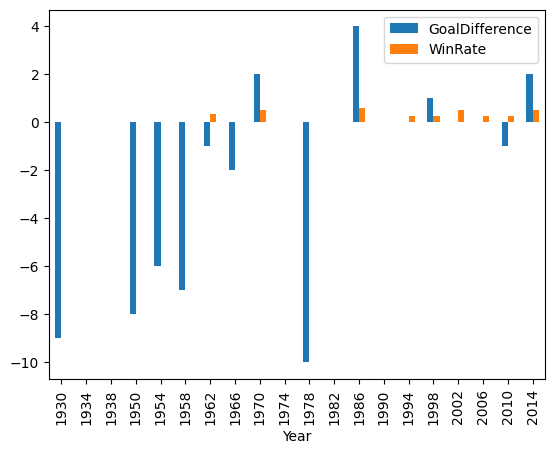

In [ ]:
mex_wr_gd = stat_mex[['GoalDifference','WinRate','Mex_Achievement','LastStage']]
mex_wr_gd = pd.merge(left=wc[wc['Country'] != 'Japan'][['Year','Country']], right=mex_wr_gd, on='Year', how='left').set_index('Year')
mex_wr_gd.plot(kind='bar')

In [ ]:
mex_wr_gd['WinRate'] = mex_wr_gd['WinRate'].fillna(0)
mex_wr_gd['GoalDifference'] = mex_wr_gd['GoalDifference'].fillna(0)

In [ ]:
mex_wr_gd['Mex_Achievement'] = mex_wr_gd['Mex_Achievement'].fillna('')
mex_wr_gd['LastStage'] = mex_wr_gd['LastStage'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == weak_host[0]:
    return 'Host'
  else:
    return 'Guest'

mex_wr_gd['Status'] = mex_wr_gd.apply(check_status, axis=1)
mex_wr_gd

,Country,GoalDifference,WinRate,Mex_Achievement,LastStage,Status
Year,,,,,,
1930,Uruguay,-9.00,0.00,Out top 4,Group,Guest
1934,Italy,0.00,0.00,,,Guest
1938,France,0.00,0.00,,,Guest
1950,Brazil,-8.00,0.00,Out top 4,Group,Guest
1954,Switzerland,-6.00,0.00,Out top 4,Group,Guest
1958,Sweden,-7.00,0.00,Out top 4,Group,Guest
1962,Chile,-1.00,0.33,Out top 4,Group,Guest
1966,England,-2.00,0.00,Out top 4,Group,Guest
1970,Mexico,2.00,0.50,Out top 4,Last 8,Host


In [ ]:
idx = mex_wr_gd.index
vals = mex_wr_gd.values
plot_vals = [i[2] for i in vals]
achv_vals = [i[4] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

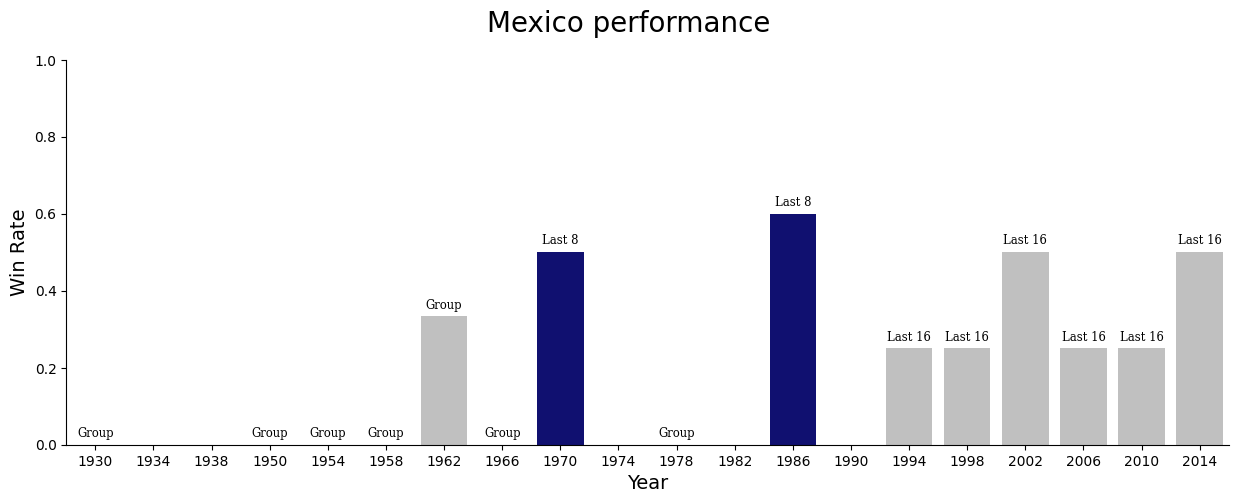

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{weak_host[0]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  # if (achv_vals[i] == 'Quarter finals') | (achv_vals[i] == 'Last 16') | (colors[i] == 'navy'):
  plt.text(i, plot_vals[i]+0.03, achv_vals[i], ha='center', va='center', family='serif', size='small')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.yticks(y_range)
plt.savefig(f'{weak_host[0]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Second team: Japan Adventure



In [ ]:
weak_host[1]

'Japan'

* *Get all Japan matches*




In [ ]:
japan= wc_match[(wc_match['HomeName'] == weak_host[1]) | (wc_match['AwayName'] == weak_host[1])]
japan= japan[japan['Country'] != 'Korea Republic'].sort_values(by='Datetime')

* *Collects Japan's result*

In [ ]:
def check_japan_result(row):
  if row['HomeName'] == weak_host[1]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == weak_host[1]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

japan['jap_result'] = japan.apply(check_japan_result, axis=1)
japan.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,jap_result
526,1998,1998-06-14 14:30:00,Group,Argentina,1,0,Japan,33500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose
540,1998,1998-06-20 14:30:00,Group,Japan,0,1,Croatia,35500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose
560,1998,1998-06-26 16:00:00,Group,Japan,1,2,Jamaica,39100,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose
605,2002,2002-06-04 18:00:00,Group,Japan,2,2,Belgium,55256,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Draw
635,2002,2002-06-09 20:30:00,Group,Japan,1,0,Russia,66108,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Win


In [ ]:
jap_dummies = pd.get_dummies(japan['jap_result'])
jap_dummies.head()

,Draw,Lose,Win
526,0,1,0
540,0,1,0
560,0,1,0
605,1,0,0
635,0,0,1


In [ ]:
full_jap = pd.concat([japan,jap_dummies], axis=1)
full_jap.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,jap_result,Draw,Lose,Win
526,1998,1998-06-14 14:30:00,Group,Argentina,1,0,Japan,33500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose,0,1,0
540,1998,1998-06-20 14:30:00,Group,Japan,0,1,Croatia,35500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose,0,1,0
560,1998,1998-06-26 16:00:00,Group,Japan,1,2,Jamaica,39100,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose,0,1,0
605,2002,2002-06-04 18:00:00,Group,Japan,2,2,Belgium,55256,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Draw,1,0,0
635,2002,2002-06-09 20:30:00,Group,Japan,1,0,Russia,66108,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Win,0,0,1


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_jap_goal_scored(row):
  if row['HomeName'] == weak_host[1]:
    return row['HomeGoals']
  elif row['AwayName'] == weak_host[1]:
    return row['AwayGoals']

In [ ]:
def check_jap_goal_conceded(row):
  if row['HomeName'] ==weak_host[1]:
    return row['AwayGoals']
  elif row['AwayName'] ==weak_host[1]:
    return row['HomeGoals']

In [ ]:
def check_jap_achievement(rows):
    if rows['Winner'] == weak_host[1]:
      return 'Winner'
    elif rows['Runners-Up'] == weak_host[1]:
      return 'Second'
    elif rows['Third'] == weak_host[1]:
      return 'Third'
    elif rows['Fourth'] == weak_host[1]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_jap['GoalScored'] = full_jap.apply(check_jap_goal_scored, axis=1)
full_jap['GoalConceded'] = full_jap.apply(check_jap_goal_conceded, axis=1)
full_jap['Achievement'] = full_jap.apply(check_jap_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}
          #  'Attendance':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_jap = full_jap.groupby('Year').agg(col_agg)
stat_jap['Team'] = weak_host[1]
stat_jap.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_jap['Jap_Achievement'] = full_jap.groupby('Year').tail(1)['Achievement'].values
stat_jap['LastStage'] = full_jap.groupby('Year').tail(1)['Stage'].values
stat_jap['LastStage']  = stat_jap['LastStage'].str.replace('Round of 16', 'Last 16')
stat_jap['LastStage']  = stat_jap['LastStage'].str.replace('Quarter finals', 'Last 8')

In [ ]:
def check_jap_last_opponent(row):
  if row['HomeName'] == weak_host[1]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_jap['LastOpponent'] = full_jap.groupby('Year').tail(1).apply(check_jap_last_opponent,axis=1).values

In [ ]:
stat_jap['GoalDifference'] = stat_jap['GoalScored'] - stat_jap['GoalConceded']
stat_jap['WinRate'] = stat_jap['Win'] / stat_jap['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_jap

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Jap_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1998,3,0,0,3,1,4,Japan,Out top 4,Group,Jamaica,-3,0.00
2002,4,2,1,1,5,3,Japan,Out top 4,Last 16,Turkey,2,0.50
2006,3,0,1,2,2,7,Japan,Out top 4,Group,Brazil,-5,0.00
2010,4,2,1,1,4,2,Japan,Out top 4,Last 16,Paraguay,2,0.50
2014,3,0,1,2,2,6,Japan,Out top 4,Group,Colombia,-4,0.00


* *Prepare data to plot*

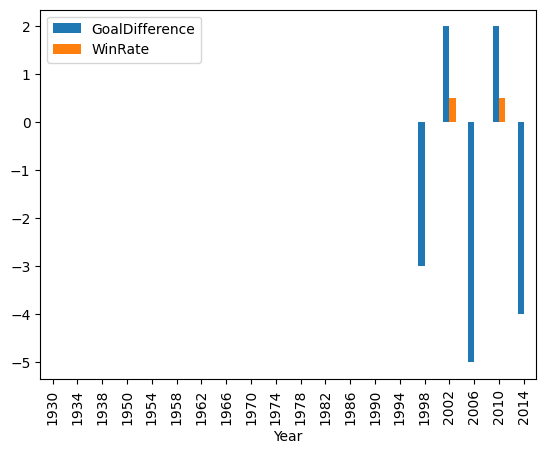

In [ ]:
jap_wr_gd = stat_jap[['GoalDifference','WinRate','Jap_Achievement','LastStage']]
jap_wr_gd = pd.merge(left=wc[wc['Country'] != 'Korea Republic'][['Year','Country']], right=jap_wr_gd, on='Year', how='left').set_index('Year')
jap_wr_gd.plot(kind='bar')

In [ ]:
jap_wr_gd['WinRate'] = jap_wr_gd['WinRate'].fillna(0)
jap_wr_gd['GoalDifference'] = jap_wr_gd['GoalDifference'].fillna(0)

In [ ]:
jap_wr_gd['Jap_Achievement'] = jap_wr_gd['Jap_Achievement'].fillna('')
jap_wr_gd['LastStage'] = jap_wr_gd['LastStage'].fillna('')


In [ ]:
def check_status(row):
  if row['Country'] == weak_host[1]:
    return 'Host'
  else:
    return 'Guest'

jap_wr_gd['Status'] = jap_wr_gd.apply(check_status, axis=1)
jap_wr_gd

,Country,GoalDifference,WinRate,Jap_Achievement,LastStage,Status
Year,,,,,,
1930,Uruguay,0.00,0.00,,,Guest
1934,Italy,0.00,0.00,,,Guest
1938,France,0.00,0.00,,,Guest
1950,Brazil,0.00,0.00,,,Guest
1954,Switzerland,0.00,0.00,,,Guest
1958,Sweden,0.00,0.00,,,Guest
1962,Chile,0.00,0.00,,,Guest
1966,England,0.00,0.00,,,Guest
1970,Mexico,0.00,0.00,,,Guest


In [ ]:
idx = jap_wr_gd.index
vals = jap_wr_gd.values
plot_vals = [i[2] for i in vals]
achv_vals = [i[4] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

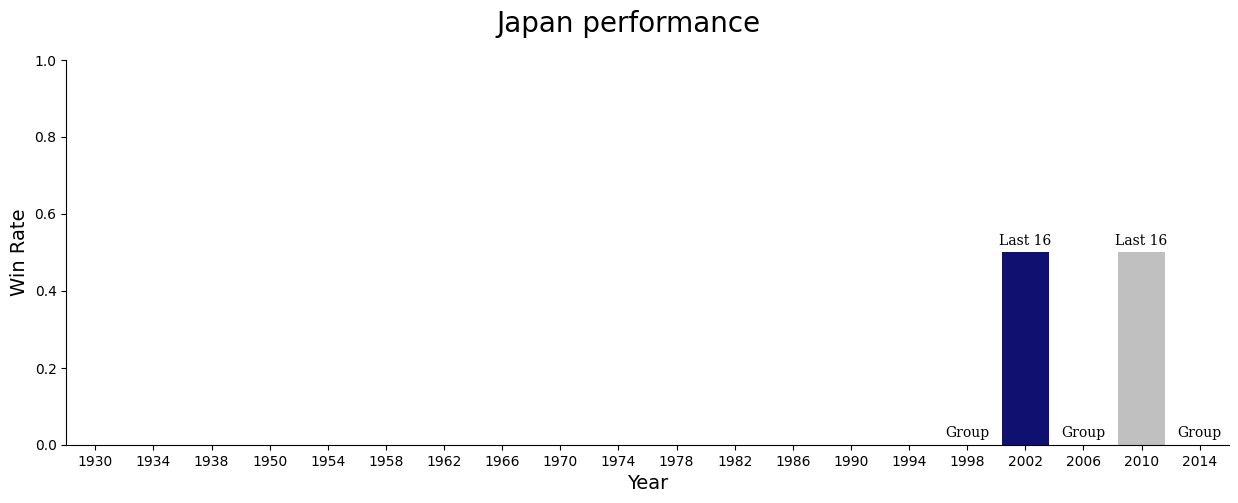

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{weak_host[1]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  # if (achv_vals[i] == 'Quarter finals')| (achv_vals[i] == 'Round of 16') | (achv_vals[i] == 'Group') | (colors[i] == 'navy'):
  plt.text(i, plot_vals[i]+0.03, achv_vals[i], ha='center', va='center', family='serif', size='medium')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.yticks(y_range)
plt.savefig(f'{weak_host[1]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Third team: Switzerland Adventure



In [ ]:
weak_host[2]

'Switzerland'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all Switzerland matches*




In [ ]:
switzerland= wc_match[(wc_match['HomeName'] == weak_host[2]) | (wc_match['AwayName'] == weak_host[2])]
switzerland= switzerland[switzerland['Country'] != 'Korea Republic'].sort_values(by='Datetime')

* *Collects Switzerland's result*

In [ ]:
def check_switzerland_result(row):
  if row['HomeName'] == weak_host[2]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == weak_host[2]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

switzerland['swi_result'] = switzerland.apply(check_switzerland_result, axis=1)
switzerland.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,swi_result
20,1934,1934-05-27 16:30:00,Round of 16,Switzerland,3,2,Netherlands,33000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win
26,1934,1934-05-31 16:30:00,Quarter finals,Czechoslovakia,3,2,Switzerland,12000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose
35,1938,1938-06-04 17:00:00,Round of 16,Switzerland,1,1,Germany,27152,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw
43,1938,1938-06-09 18:00:00,Round of 16,Switzerland,4,2,Germany,20025,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Win
45,1938,1938-06-12 17:00:00,Quarter finals,Hungary,2,0,Switzerland,15000,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Lose


In [ ]:
swi_dummies = pd.get_dummies(switzerland['swi_result'])
swi_dummies.head()

,Draw,Lose,Win
20,0,0,1
26,0,1,0
35,1,0,0
43,0,0,1
45,0,1,0


In [ ]:
full_swi = pd.concat([switzerland,swi_dummies], axis=1)
full_swi.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,swi_result,Draw,Lose,Win
20,1934,1934-05-27 16:30:00,Round of 16,Switzerland,3,2,Netherlands,33000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Win,0,0,1
26,1934,1934-05-31 16:30:00,Quarter finals,Czechoslovakia,3,2,Switzerland,12000,Italy,Italy,Czechoslovakia,Germany,Austria,363000,Winner,Lose,0,1,0
35,1938,1938-06-04 17:00:00,Round of 16,Switzerland,1,1,Germany,27152,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Draw,1,0,0
43,1938,1938-06-09 18:00:00,Round of 16,Switzerland,4,2,Germany,20025,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Win,0,0,1
45,1938,1938-06-12 17:00:00,Quarter finals,Hungary,2,0,Switzerland,15000,France,Italy,Hungary,Brazil,Sweden,375700,Out top 4,Lose,0,1,0


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_swi_goal_scored(row):
  if row['HomeName'] == weak_host[2]:
    return row['HomeGoals']
  elif row['AwayName'] == weak_host[2]:
    return row['AwayGoals']

In [ ]:
def check_swi_goal_conceded(row):
  if row['HomeName'] ==weak_host[2]:
    return row['AwayGoals']
  elif row['AwayName'] ==weak_host[2]:
    return row['HomeGoals']

In [ ]:
def check_swi_achievement(rows):
    if rows['Winner'] == weak_host[2]:
      return 'Winner'
    elif rows['Runners-Up'] == weak_host[2]:
      return 'Second'
    elif rows['Third'] == weak_host[2]:
      return 'Third'
    elif rows['Fourth'] == weak_host[2]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_swi['GoalScored'] = full_swi.apply(check_swi_goal_scored, axis=1)
full_swi['GoalConceded'] = full_swi.apply(check_swi_goal_conceded, axis=1)
full_swi['Achievement'] = full_swi.apply(check_swi_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}
          #  'Attendance':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_swi = full_swi.groupby('Year').agg(col_agg)
stat_swi['Team'] = weak_host[2]
stat_swi.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_swi['Swi_Achievement'] = full_swi.groupby('Year').tail(1)['Achievement'].values
stat_swi['LastStage'] = full_swi.groupby('Year').tail(1)['Stage'].values
stat_swi['LastStage']  = stat_swi['LastStage'].str.replace('Round of 16', 'Last 16')
stat_swi['LastStage']  = stat_swi['LastStage'].str.replace('Quarter finals', 'Last 8')

In [ ]:
def check_swi_last_opponent(row):
  if row['HomeName'] == weak_host[2]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_swi['LastOpponent'] = full_swi.groupby('Year').tail(1).apply(check_swi_last_opponent,axis=1).values

In [ ]:
stat_swi['GoalDifference'] = stat_swi['GoalScored'] - stat_swi['GoalConceded']
stat_swi['WinRate'] = stat_swi['Win'] / stat_swi['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_swi

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,Swi_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1934,2,1,0,1,5,5,Switzerland,Out top 4,Last 8,Czechoslovakia,0,0.50
1938,3,1,1,1,5,5,Switzerland,Out top 4,Last 8,Hungary,0,0.33
1950,3,1,1,1,4,6,Switzerland,Out top 4,Group,Mexico,-2,0.33
1954,4,2,0,2,11,11,Switzerland,Out top 4,Last 8,Austria,0,0.50
1962,3,0,0,3,2,8,Switzerland,Out top 4,Group,Italy,-6,0.00
1966,3,0,0,3,1,9,Switzerland,Out top 4,Group,Argentina,-8,0.00
1994,4,1,1,2,5,7,Switzerland,Out top 4,Last 16,Spain,-2,0.25
2006,4,2,2,0,4,0,Switzerland,Out top 4,Last 16,Ukraine,4,0.50
2010,3,1,1,1,1,1,Switzerland,Out top 4,Group,Honduras,0,0.33


* *Prepare data to plot*

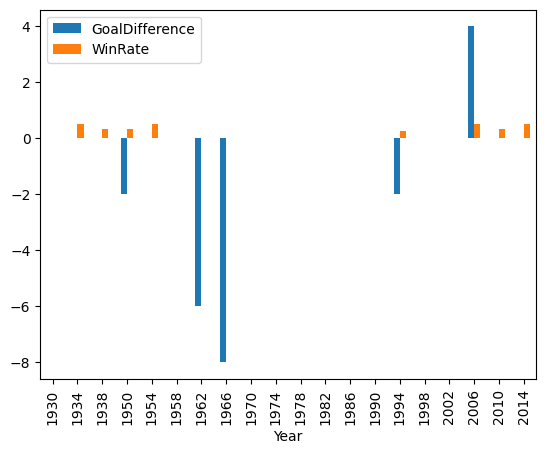

In [ ]:
swi_wr_gd = stat_swi[['GoalDifference','WinRate','Swi_Achievement','LastStage']]
swi_wr_gd = pd.merge(left=wc[wc['Country'] != 'Korea Republic'][['Year','Country']], right=swi_wr_gd, on='Year', how='left').set_index('Year')
swi_wr_gd.plot(kind='bar')

In [ ]:
swi_wr_gd['WinRate'] = swi_wr_gd['WinRate'].fillna(0)
swi_wr_gd['GoalDifference'] = swi_wr_gd['GoalDifference'].fillna(0)

In [ ]:
swi_wr_gd['Swi_Achievement'] = swi_wr_gd['Swi_Achievement'].fillna('')
swi_wr_gd['LastStage'] = swi_wr_gd['LastStage'].fillna('')

In [ ]:
def check_status(row):
  if row['Country'] == weak_host[2]:
    return 'Host'
  else:
    return 'Guest'

swi_wr_gd['Status'] = swi_wr_gd.apply(check_status, axis=1)
swi_wr_gd

,Country,GoalDifference,WinRate,Swi_Achievement,LastStage,Status
Year,,,,,,
1930,Uruguay,0.00,0.00,,,Guest
1934,Italy,0.00,0.50,Out top 4,Last 8,Guest
1938,France,0.00,0.33,Out top 4,Last 8,Guest
1950,Brazil,-2.00,0.33,Out top 4,Group,Guest
1954,Switzerland,0.00,0.50,Out top 4,Last 8,Host
1958,Sweden,0.00,0.00,,,Guest
1962,Chile,-6.00,0.00,Out top 4,Group,Guest
1966,England,-8.00,0.00,Out top 4,Group,Guest
1970,Mexico,0.00,0.00,,,Guest


In [ ]:
idx = swi_wr_gd.index
vals = swi_wr_gd.values
plot_vals = [i[2] for i in vals]
achv_vals = [i[4] for i in vals]

In [ ]:
colors = []
for x in vals:
  if x[-1] == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')

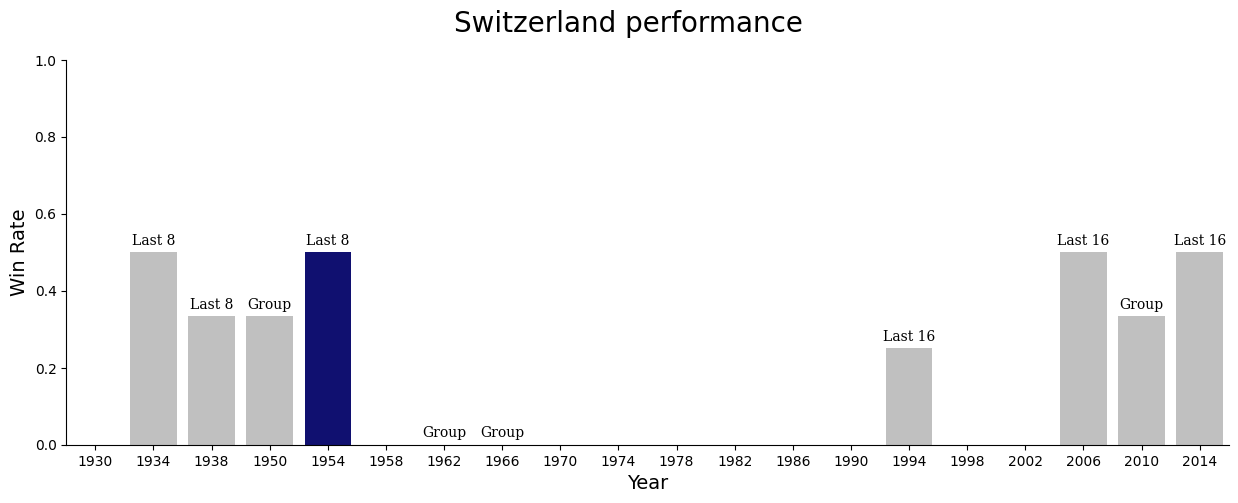

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{weak_host[2]} performance', fontsize=20)

sns.barplot(x=idx, y=plot_vals, palette=colors)
for i in range(len(idx)):
  # if (achv_vals[i] == 'Quarter finals')| (achv_vals[i] == 'Last 16') |(achv_vals[i] == 'Group') | (colors[i] == 'navy'):
  plt.text(i, plot_vals[i]+0.03, achv_vals[i], ha='center', va='center', family='serif', size='medium')
sns.despine()
# plt.text(20, plot_vals[-1]+0.01, achv_vals[-1], ha='center', va='center')
plt.xlabel('Year', fontsize=14)
plt.yticks(y_range)
plt.ylabel('Win Rate', fontsize=14)
plt.savefig(f'{weak_host[2]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

### Fourth team: South Africa Adventure



In [ ]:
weak_host[3]

'South Africa'

In [ ]:
# argentina[argentina['Country'] != 'Japan'].sort_values(by='Datetime')

* *Get all South Arfica matches*




In [ ]:
saf= wc_match[(wc_match['HomeName'] == weak_host[3]) | (wc_match['AwayName'] == weak_host[3])]
saf= saf[saf['Country'] != 'Korea Republic'].sort_values(by='Datetime')

* *Collects South Arfica's result*

In [ ]:
def check_saf_result(row):
  if row['HomeName'] == weak_host[3]:
    if row['HomeGoals'] > row['AwayGoals']:
      return 'Win'
    elif row['HomeGoals'] == row['AwayGoals']:
      return 'Draw'
    else:
      return 'Lose'
  elif row['AwayName'] == weak_host[3]:
    if row['AwayGoals'] > row['HomeGoals']:
      return 'Win'
    elif row['AwayGoals'] == row['HomeGoals']:
      return 'Draw'
    else:
      return 'Lose'

saf['saf_result'] = saf.apply(check_saf_result, axis=1)
saf.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,saf_result
522,1998,1998-06-12 21:00:00,Group,France,3,0,South Africa,55000,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose
536,1998,1998-06-18 17:30:00,Group,South Africa,1,1,Denmark,33500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Draw
553,1998,1998-06-24 16:00:00,Group,South Africa,2,2,Saudi Arabia,31800,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Draw
591,2002,2002-06-02 16:30:00,Group,Paraguay,2,2,South Africa,25186,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Draw
627,2002,2002-06-08 15:30:00,Group,South Africa,1,0,Slovenia,47226,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Win


In [ ]:
saf_dummies = pd.get_dummies(saf['saf_result'])
saf_dummies.head()

,Draw,Lose,Win
522,0,1,0
536,1,0,0
553,1,0,0
591,1,0,0
627,0,0,1


In [ ]:
full_saf = pd.concat([saf,saf_dummies], axis=1)
full_saf.head()

,Year,Datetime,Stage,HomeName,HomeGoals,AwayGoals,AwayName,Attendance,Country,Winner,Runners-Up,Third,Fourth,All_Attendance,HostCountryAchievement,saf_result,Draw,Lose,Win
522,1998,1998-06-12 21:00:00,Group,France,3,0,South Africa,55000,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Lose,0,1,0
536,1998,1998-06-18 17:30:00,Group,South Africa,1,1,Denmark,33500,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Draw,1,0,0
553,1998,1998-06-24 16:00:00,Group,South Africa,2,2,Saudi Arabia,31800,France,France,Brazil,Croatia,Netherlands,2785100,Winner,Draw,1,0,0
591,2002,2002-06-02 16:30:00,Group,Paraguay,2,2,South Africa,25186,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Draw,1,0,0
627,2002,2002-06-08 15:30:00,Group,South Africa,1,0,Slovenia,47226,Japan,Brazil,Germany,Turkey,Korea Republic,2705197,Out top 4,Win,0,0,1


* *Calculate all information can be needed: goal scored, goal conceded, achievment, last stage, last opponent, goal differences,win rate over the year*

In [ ]:
def check_saf_goal_scored(row):
  if row['HomeName'] == weak_host[3]:
    return row['HomeGoals']
  elif row['AwayName'] == weak_host[3]:
    return row['AwayGoals']

In [ ]:
def check_saf_goal_conceded(row):
  if row['HomeName'] ==weak_host[3]:
    return row['AwayGoals']
  elif row['AwayName'] ==weak_host[3]:
    return row['HomeGoals']

In [ ]:
def check_saf_achievement(rows):
    if rows['Winner'] == weak_host[3]:
      return 'Winner'
    elif rows['Runners-Up'] == weak_host[3]:
      return 'Second'
    elif rows['Third'] == weak_host[3]:
      return 'Third'
    elif rows['Fourth'] == weak_host[3]:
      return 'Fourth'
    else:
      return 'Out top 4'

In [ ]:
full_saf['GoalScored'] = full_saf.apply(check_saf_goal_scored, axis=1)
full_saf['GoalConceded'] = full_saf.apply(check_saf_goal_conceded, axis=1)
full_saf['Achievement'] = full_saf.apply(check_saf_achievement,axis=1)

In [ ]:
col_agg = {'HomeName':'count',
            'Win':'sum',
            'Draw':'sum',
            'Lose':'sum',
           'GoalScored':'sum',
           'GoalConceded':'sum'}
          #  'Attendance':'sum'}

* *Get all information and create statistical table*

In [ ]:
stat_saf = full_saf.groupby('Year').agg(col_agg)
stat_saf['Team'] = weak_host[3]
stat_saf.rename(columns={'HomeName': 'MatchesPlayed'},inplace=True)

In [ ]:
stat_saf['saf_Achievement'] = full_saf.groupby('Year').tail(1)['Achievement'].values
stat_saf['LastStage'] = full_saf.groupby('Year').tail(1)['Stage'].values
stat_saf['LastStage']  = stat_saf['LastStage'].str.replace('Round of 16', 'Last 16')
stat_saf['LastStage']  = stat_saf['LastStage'].str.replace('Quarter finals', 'Last 8')

In [ ]:
def check_saf_last_opponent(row):
  if row['HomeName'] == weak_host[3]:
    return row['AwayName']
  else:
    return row['HomeName']

In [ ]:
stat_saf['LastOpponent'] = full_saf.groupby('Year').tail(1).apply(check_saf_last_opponent,axis=1).values

In [ ]:
stat_saf['GoalDifference'] = stat_saf['GoalScored'] - stat_saf['GoalConceded']
stat_saf['WinRate'] = stat_saf['Win'] / stat_saf['MatchesPlayed']
# stat_ger = stat_ger.reset_index(level='Country')
stat_saf

,MatchesPlayed,Win,Draw,Lose,GoalScored,GoalConceded,Team,saf_Achievement,LastStage,LastOpponent,GoalDifference,WinRate
Year,,,,,,,,,,,,
1998,3,0,2,1,3,6,South Africa,Out top 4,Group,Saudi Arabia,-3,0.00
2002,3,1,1,1,5,5,South Africa,Out top 4,Group,Spain,0,0.33
2010,3,1,1,1,3,5,South Africa,Out top 4,Group,France,-2,0.33


* *Prepare data to plot*

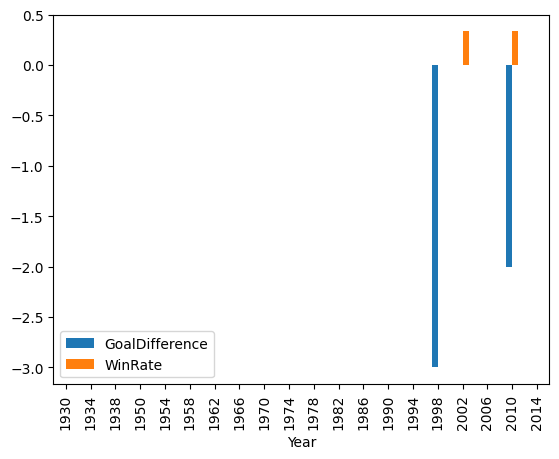

In [ ]:
saf_wr_gd = stat_saf[['GoalDifference','WinRate','saf_Achievement','LastStage']]
saf_wr_gd = pd.merge(left=wc[wc['Country'] != 'Korea Republic'][['Year','Country']], right=saf_wr_gd, on='Year', how='left').set_index('Year')
saf_wr_gd.plot(kind='bar')

In [ ]:
saf_wr_gd['WinRate'] = saf_wr_gd['WinRate'].fillna(0)
saf_wr_gd['GoalDifference'] = saf_wr_gd['GoalDifference'].fillna(0)

In [ ]:
saf_wr_gd['saf_Achievement'] = saf_wr_gd['saf_Achievement'].fillna('')
saf_wr_gd['LastStage'] = saf_wr_gd['LastStage'].fillna('')

In [ ]:
weak_host

['Mexico', 'Japan', 'Switzerland', 'South Africa']

In [ ]:
def check_status(row):
  if row['Country'] == weak_host[3]:
    return 'Host'
  else:
    return 'Guest'

saf_wr_gd['Status'] = saf_wr_gd.apply(check_status, axis=1)
saf_wr_gd

,Country,GoalDifference,WinRate,saf_Achievement,LastStage,Status
Year,,,,,,
1930,Uruguay,0.00,0.00,,,Guest
1934,Italy,0.00,0.00,,,Guest
1938,France,0.00,0.00,,,Guest
1950,Brazil,0.00,0.00,,,Guest
1954,Switzerland,0.00,0.00,,,Guest
1958,Sweden,0.00,0.00,,,Guest
1962,Chile,0.00,0.00,,,Guest
1966,England,0.00,0.00,,,Guest
1970,Mexico,0.00,0.00,,,Guest


In [ ]:
idx = saf_wr_gd.index
vals = saf_wr_gd.values
plot_vals = [i[2] for i in vals]
achv_vals = [i[4] for i in vals]

In [ ]:
colors = []
for x in list(saf_wr_gd['Status']):
  if x == 'Host':
    colors.append('navy')
  else:
    colors.append('silver')
colors

['silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'silver',
 'navy',
 'silver']

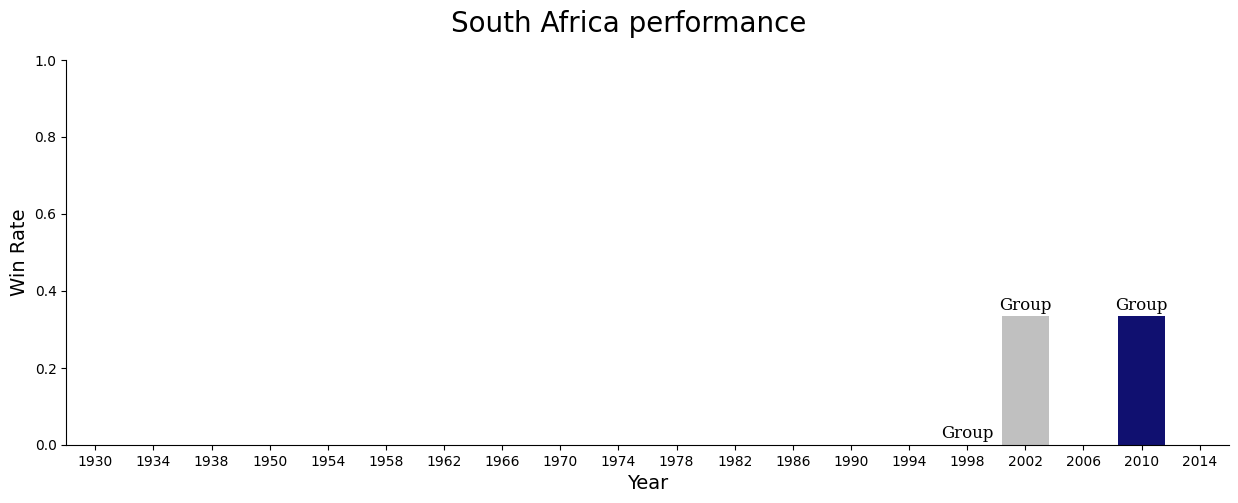

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.suptitle(f'{weak_host[3]} performance', fontsize=20)

sns.barplot(x=saf_wr_gd.index, y=list(saf_wr_gd['WinRate']), palette=colors)
for i in range(len(idx)):
  if (list(saf_wr_gd['LastStage'])[i] == 'Quarter finals')| (list(saf_wr_gd['LastStage'])[i] == 'Last 16') | (list(saf_wr_gd['LastStage'])[i] == 'Group') | (colors[i] == 'navy'):
    plt.text(i, plot_vals[i]+0.03, list(saf_wr_gd['LastStage'])[i], ha='center', va='center', family='serif', size='large')
sns.despine()
plt.xlabel('Year', fontsize=14)
plt.yticks(y_range)
plt.ylabel('Win Rate', fontsize=14)
plt.savefig(f'{weak_host[3]}.png', dpi=80, transparent=True, bbox_inches='tight')
plt.show()

# Export to Google Data Studio

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('WorldCupProject')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
      worksheet_name: name of sheet in spreadsheet
      worksheet_id (int): 0, 1, 2, ... 
      data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
wc['Winner'].value_counts()

Brazil       6
Germany      4
Italy        4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

In [ ]:
host_country = wc['Country'].value_counts().reset_index()

In [ ]:
ranking_teams

{'Argentina': 12,
 'Austria': 2,
 'Belgium': 1,
 'Brazil': 26,
 'Bulgaria': 1,
 'Chile': 1,
 'Croatia': 1,
 'Czechoslovakia': 4,
 'England': 4,
 'France': 8,
 'Germany': 27,
 'Hungary': 4,
 'Italy': 18,
 'Korea Republic': 2,
 'Netherlands': 8,
 'Poland': 2,
 'Portugal': 2,
 'Soviet Union': 1,
 'Spain': 4,
 'Sweden': 5,
 'Turkey': 2,
 'USA': 1,
 'Uruguay': 9,
 'Yugoslavia': 2}

In [ ]:
ranking_teams = pd.Series(ranking_teams, name='Points')
ranking_teams = ranking_teams.reset_index()
ranking_teams.rename(columns={'index':'Country'}, inplace=True)

In [ ]:
winner_count = wc[wc['Country'] != 'Japan']['Winner'].value_counts().reset_index().rename(columns={'index':'Country'})

In [ ]:
#Notice! Replace the key by your google sheet key

export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'hometeam-top4', hometeam_top4_data)

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'host-country', host_country)

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-arg', stat_arg.reset_index())

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-bra', stat_bra.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-uru', stat_uru.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-ger', stat_ger.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-ita', stat_ita.reset_index())

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-mex', stat_mex.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-swi', stat_swi.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-jap', stat_jap.reset_index())
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'stat-saf', stat_saf.reset_index())

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'wc-stat', wc)

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'ranking-teams', ranking_teams)

In [ ]:
export_data_to_new_sheet('1zfVbaprtwsH0OqXP_7DNuQxvG-QVcVFwsaoDzVqCYOY', 'winner-count', winner_count)

#Player Table

In [ ]:
player.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
